| Model Group                   | Model Name                    | Link | Viable | Dependencies                                     | Input Requirements                             | Additional Preprocessing/Data Formats                                    | Data Type    | Complexity | Training Time |
|-------------------------------|-------------------------------|------|--------|--------------------------------------------------|------------------------------------------------|---------------------------------------------------|---------------|------------|---------------|
| Hybrid Models                 | Prophet                       | [Link](#) | Yes    | Python Native (Stan backend)                     | 2D shape (timestamp, data)                     | Dataframe with 'ds' (date) and 'y' (value) columns | Univariate   | Low        | Moderate      |
| Hybrid Models                 | Flow Forecast                 | [Link](#) | Yes    | PyTorch                                          | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | Moderate   | High          |
| Hybrid Models                 | DeepTime                      | [Link](#) | Yes    | ?                                                | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | High       | High          |
| Machine Learning Models       | XGBoost                       | [Link](#) | Yes    | Python Native                                    | 2D shape (data, features)                      | Requires numerical input, handles missing values   | Both         | Moderate   | Moderate      |
| Machine Learning Models       | LightGBM                      | [Link](#) | Yes    | Python Native                                    | 2D shape (data, features)                      | Requires numerical input, handles missing values   | Both         | Moderate   | Moderate      |
| Machine Learning Models       | AutoTS                        | [Link](#) | Yes    | ?                                                | 2D shape (timestamp, data)                     | Requires a univariate time series                  | Univariate   | Low        | Low           |
| Machine Learning Models       | PyCaret                       | [Link](#) | Yes    | Python Native (Multiple backend models)          | 2D shape (data, features)                      | Automatic preprocessing, handles categorical features and missing values | Both         | Low        | Low           |
| Neural Network Models         | LSTM                          | [Link](#) | Yes    | TensorFlow, Keras, PyTorch (depends on implementation) | 3D shape (timestamp, data, features)           | Requires data normalization, sequences of fixed length | Both         | High       | High          |
| Neural Network Models         | TCN                           | [Link](#) | Yes    | TensorFlow, Keras, PyTorch (depends on implementation) | 3D shape (timestamp, data, features)           | Requires data normalization, sequences of fixed length | Both         | High       | High          |
| Neural Network Models         | Temporal Fusion Transformer  | [Link](#) | Yes    | TensorFlow                                       | 3D shape (timestamp, data, features)           | Requires data normalization, handles missing values | Multivariate | High       | High          |
| Traditional Statistical Models| GARCH                         | [Link](#) | Yes    | Python Native (often via libraries like `arch`)  | 2D shape (timestamp, data)                     | Requires stationary data, handles missing values    | Univariate   | Low        | Low           |
| Traditional Statistical Models| Linear Regression             | [Link](#) | Yes    | Python Native (often via libraries like `scikit-learn`) | 2D shape (data, features)                      | Requires numerical input                             | Both         | Low        | Low           |
| Traditional Statistical Models| Auto-Arima                    | [Link](#) | Yes    | Python Native (often via libraries like `pmdarima`) | 2D shape (timestamp, data)                     | Requires stationary data                             | Univariate   | Moderate   | Moderate      |
| Traditional Statistical Models| Markov Chains                 | [Link](#) | Yes    | Python Native                                    | 2D shape (states, transition probabilities)    | Requires state transition matrix                    | Both         | Low        | Low           |


## <font color= blue >1. Importing the Necessary Libraries</font> <a class="anchor" id="second-bullet"></a>
--------------------------------------------------------------

In [1]:
#!pip install requests
#!pip install numpy
#!pip install pandas
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install cryptocmd
#!pip install prettytable
#!pip install joblib
#!pip install scikit-learn
#!pip install lightgbm
#!pip install xgboost
#!pip install statsmodels
#!pip install pmdarima
#!pip install arch
#!pip install tensorflow
#!pip install keras-tuner
#!pip install bokeh
#!pip install solenium

In [2]:
# Standard library imports
import os
import time
import sys
import warnings
import logging
import pickle
from typing import Optional
from datetime import datetime, timedelta
from math import pi

# Third-party imports
import requests
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper
from prettytable import PrettyTable
import joblib
from joblib import dump, load
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from pmdarima import auto_arima
from arch import arch_model
from pandas.tseries.holiday import USFederalHolidayCalendar
from scipy.signal import detrend
import xgboost as xgb
#from selenium import webdriver

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Dropout, LSTM, TimeDistributed, Conv1D, MaxPooling1D, Flatten,
                                    ConvLSTM2D, BatchNormalization, GRU)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras_tuner import HyperModel, RandomSearch
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras_tuner.tuners import BayesianOptimization

# Plotting and Visualization
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import (HoverTool, ColumnDataSource, WheelZoomTool, Span, Range1d,
                          FreehandDrawTool, MultiLine, NumeralTickFormatter, Button, CustomJS)
from bokeh.layouts import column, row
from bokeh.io import curdoc, export_png
from bokeh.models.widgets import CheckboxGroup
from bokeh.themes import Theme
from bokeh.io.export import get_screenshot_as_png
from IPython.core.display import display, HTML
import hashlib


# Other settings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.3f}'.format)
logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
logger = logging.getLogger(__name__)
display(HTML("<style>.bk-root { margin-left: auto; margin-right: auto; }</style>"))


print("Hello Everyone")

C:\Users\migue\AppData\Local\Temp\ipykernel_20876\875911377.py:70: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Hello Everyone


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np
import logging
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import logging
from scipy.stats import jarque_bera, kstest
from statsmodels.tsa.stattools import kpss
#from scipy.stats import boxcox, invboxcox

In [4]:
class CryptoData:
    """
    The CryptoData class is responsible for fetching and validating cryptocurrency data. 
    It provides methods to fetch raw data, validate its integrity, and format it for display.
    
    Attributes:
    - EXPECTED_COLUMNS: A set of expected columns in the fetched data.
    - crypto_symbol: The cryptocurrency symbol to fetch.
    - retries: The maximum number of data fetch retries.
    - backoff_factor: The exponential backoff factor for retries.
    """
    
    EXPECTED_COLUMNS = {'Date', 'Open', 'High', 'Low', 'Close', 'Market Cap', 'Volume'}

    def __init__(self, crypto_symbol: str, retries: int = 5, backoff_factor: float = 0.3):
        """Initializes the class with the given cryptocurrency symbol."""
        logger.info("Initializing CryptoData class.")
        self.crypto_symbol = crypto_symbol
        self.retries = retries
        self.backoff_factor = backoff_factor
        logger.info("CryptoData class initialized.")

    def _validate_data(self, df: pd.DataFrame) -> Optional[pd.DataFrame]:
        """Validates the integrity of the fetched data."""
        logger.info("Starting data validation.")
        if df.isnull().any().any():
            raise ValueError("The fetched data contains missing values.")
        if not self.EXPECTED_COLUMNS.issubset(df.columns):
            raise ValueError("Some expected columns are missing in the data.")
        for col in df.columns:
            if col != 'Date' and not pd.api.types.is_numeric_dtype(df[col]):
                raise ValueError(f"Column {col} is not of numeric type in the fetched data.")
        logger.info("Data validation completed.")
        return df

    def _fetch_cryptocmd_data(self) -> pd.DataFrame:
        """Fetches cryptocurrency data with retries and exponential backoff."""
        logger.info(f"Fetching data for {self.crypto_symbol}.")
        for retry in range(self.retries):
            try:
                scraper = CmcScraper(self.crypto_symbol)
                df = scraper.get_dataframe()
                return self._validate_data(df)
            except Exception as e:
                logger.error(f'An error occurred while fetching data: {e}')
                sleep_time = self.backoff_factor * (2 ** retry)
                time.sleep(sleep_time)
                logger.info(f'Retrying... (Attempt {retry + 1}/{self.retries})')
        else:
            raise Exception('Max retries reached. Could not fetch the data.')
        logger.info(f"Data fetched successfully for {self.crypto_symbol}.")

    def get_cryptocmd_data(self) -> pd.DataFrame:
        """Fetches and returns the cryptocurrency data."""
        logger.info(f"Getting {self.crypto_symbol} data.")
        df = self._fetch_cryptocmd_data()
        df.set_index('Date', inplace=True)
        df.index = pd.to_datetime(df.index)
        df = df.iloc[::-1]  # Reversing the DataFrame
        logger.info(f"Data obtained successfully for {self.crypto_symbol}.")
        return df.round(2)

    @staticmethod
    def _format_monetary_value(value: float) -> str:
        """Formats a monetary value to a string."""
        return "${:,.2f}".format(value)

    @staticmethod
    def _format_volume_value(value: float) -> str:
        """Formats a volume value to a string."""
        if value > 1e9:
            return "{:.2f}B".format(value/1e9)
        elif value > 1e6:
            return "{:.2f}M".format(value/1e6)
        else:
            return "{:,.2f}".format(value)

    def get_display_data(self) -> pd.DataFrame:
        """Fetches and formats the cryptocurrency data for display."""
        logger.info(f"Formatting display data for {self.crypto_symbol}.")
        display_df = self.get_cryptocmd_data().copy()
        monetary_columns = ['Open', 'High', 'Low', 'Close']
        display_df[monetary_columns] = display_df[monetary_columns].applymap(self._format_monetary_value)
        volume_like_columns = ['Volume', 'Market Cap']
        display_df[volume_like_columns] = display_df[volume_like_columns].applymap(self._format_volume_value)
        logger.info(f"Display data formatted successfully for {self.crypto_symbol}.")
        return display_df


In [5]:
# Initialize CryptoData class for different cryptocurrencies
crypto_symbols = ['BTC', 'ETH']
crypto_data_objects = {}

for symbol in crypto_symbols:
    crypto_data_objects[symbol] = CryptoData(symbol)

# Fetch and save data
data_c = {}
display_data = {}

for symbol, crypto_data_object in crypto_data_objects.items():
    data_c[symbol] = crypto_data_object.get_cryptocmd_data()
    display_data[symbol] = crypto_data_object.get_display_data()

# Now, data['BTC'], data['ETH'], etc. contain the data
# And display_data['BTC'], display_data['ETH'], etc. contain the display data


2023-09-20 23:41:13,967 [INFO] - Initializing CryptoData class.
2023-09-20 23:41:13,968 [INFO] - CryptoData class initialized.
2023-09-20 23:41:13,969 [INFO] - Initializing CryptoData class.
2023-09-20 23:41:13,970 [INFO] - CryptoData class initialized.
2023-09-20 23:41:13,971 [INFO] - Getting BTC data.
2023-09-20 23:41:13,972 [INFO] - Fetching data for BTC.
2023-09-20 23:41:14,387 [INFO] - Starting data validation.
2023-09-20 23:41:14,389 [INFO] - Data validation completed.
2023-09-20 23:41:14,396 [INFO] - Data obtained successfully for BTC.
2023-09-20 23:41:14,401 [INFO] - Formatting display data for BTC.
2023-09-20 23:41:14,402 [INFO] - Getting BTC data.
2023-09-20 23:41:14,403 [INFO] - Fetching data for BTC.
2023-09-20 23:41:14,842 [INFO] - Starting data validation.
2023-09-20 23:41:14,845 [INFO] - Data validation completed.
2023-09-20 23:41:14,852 [INFO] - Data obtained successfully for BTC.
2023-09-20 23:41:14,881 [INFO] - Display data formatted successfully for BTC.
2023-09-20 2

In [6]:
data = data_c['BTC'].copy()
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,136.690,143.370,110.850,127.950,25956.840,1419007893.660
2013-04-29,134.440,147.490,134.000,144.540,0.000,1603768864.500
2013-04-30,144.000,146.930,134.050,139.000,0.000,1542813125.000
2013-05-01,139.000,139.890,107.720,116.990,0.000,1298954593.750
2013-05-02,116.380,125.600,92.280,105.210,0.000,1168517495.250
...,...,...,...,...,...,...
2023-09-15,26533.820,26840.500,26240.700,26608.690,11479735788.300,518517274733.030
2023-09-16,26606.200,26754.770,26473.890,26568.280,7402031416.600,517755173478.600
2023-09-17,26567.930,26618.000,26445.080,26534.190,6774210669.730,517116820259.640


In [7]:
class CryptoDataAnalytics:
    """
    This class is responsible for performing enhanced analytics on cryptocurrency data.

    Attributes:
        df (pd.DataFrame): The DataFrame containing the cryptocurrency data.
        output_dir (str): The directory where analytics files will be saved.
    """
    
    def __init__(self, crypto_data: pd.DataFrame):
        logger.info("Initializing CryptoDataAnalytics class.")
        self.df = crypto_data
        self.output_dir = 'analytics_csv'
        self._create_output_dir()
        logger.info("CryptoDataAnalytics class initialized successfully.")
        
    def _create_output_dir(self):
        """Create output directory if it doesn't exist."""
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
            logger.info(f"Created output directory: {self.output_dir}")
            
    def calculate_historical_volatility(self, column: str = 'Close', window: int = 30) -> pd.DataFrame:
        """Calculates historical volatility."""
        logger.info("Initiating historical volatility calculation.")
        if len(self.df) < window:
            logger.error("Data length is less than the rolling window size. Cannot calculate volatility.")
            raise ValueError("Insufficient data for volatility calculation.")
        
        log_ret = np.log(self.df[column] / self.df[column].shift(1))
        volatility = log_ret.rolling(window=window).std()
        logger.info("Historical volatility calculation successful.")
        return pd.DataFrame(volatility, columns=['Historical Volatility'])
        
    def perform_time_analysis(self, freq: str):
        """Performs time-based analysis."""
        logger.info(f"Initiating {freq}-based time analysis.")
        data = self.df.resample(freq).agg({'Close': ['last', 'mean', 'max', 'min'], 'Open': 'first'})
        data.columns = data.columns.map('_'.join).str.strip('_')
        data = self.calculate_price_variation(data)
        
        # Reorder columns
        ordered_columns = ['Close_mean', 'Close_max', 'Close_min', 'Close_last', 'Open_first', 'variation_$_abs', 'variation_%_rel']
        data = data[ordered_columns]
        
        logger.info(f"{freq}-based time analysis successful.")
        return data

    def calculate_price_variation(self, data: pd.DataFrame):
        """Calculates price variation."""
        logger.info("Initiating price variation calculation.")
        data['variation_$_abs'] = data['Close_last'] - data['Open_first']
        data['variation_%_rel'] = ((data['Close_last'] - data['Open_first']) / data['Open_first']) * 100
        logger.info("Price variation calculation successful.")
        return data
    
    def retrieve_all_time_records(self):
        """Retrieves all-time price records."""
        logger.info("Initiating retrieval of all-time records.")
        all_time_high = self.df['Close'].max()
        all_time_low = self.df['Close'].min()
        all_time_high_date = self.df['Close'].idxmax().strftime('%Y-%m-%d')
        all_time_low_date = self.df['Close'].idxmin().strftime('%Y-%m-%d')
        logger.info("All-time records retrieval successful.")
        return all_time_high, all_time_low, all_time_high_date, all_time_low_date
    
    def perform_and_save_all_analyses(self):
        """Performs all analyses and saves them to Excel files."""
        logger.info("Initiating all analyses.")
        self.save_analysis_to_excel(self.perform_time_analysis('Y'), 'yearly_data.xlsx')
        self.save_analysis_to_excel(self.perform_time_analysis('M'), 'monthly_data.xlsx')
        self.save_analysis_to_excel(self.perform_time_analysis('W'), 'weekly_data.xlsx')
        logger.info("All analyses have been successfully performed and saved.")
        
    def save_analysis_to_excel(self, analysis: pd.DataFrame, filename: str):
        """Saves the given DataFrame to an Excel file in the output directory."""
        filepath = os.path.join(self.output_dir, filename)
        analysis.to_excel(filepath)
        logger.info(f"Analysis saved to {filepath}.")


In [8]:
analytics = CryptoDataAnalytics(data)

# Retrieve and display all-time records
all_time_high, all_time_low, all_time_high_date, all_time_low_date = analytics.retrieve_all_time_records()
print(f"All Time High: {all_time_high} on {all_time_high_date}")
print(f"All Time Low: {all_time_low} on {all_time_low_date}")

# Run all analyses and save them
analytics.perform_and_save_all_analyses()

# Additionally, display the DataFrames
yearly_data = analytics.perform_time_analysis('Y')
monthly_data = analytics.perform_time_analysis('M')
weekly_data = analytics.perform_time_analysis('W')

display(yearly_data)
display(monthly_data)
display(weekly_data)


2023-09-20 23:41:33,615 [INFO] - Initializing CryptoDataAnalytics class.
2023-09-20 23:41:33,617 [INFO] - CryptoDataAnalytics class initialized successfully.
2023-09-20 23:41:33,620 [INFO] - Initiating retrieval of all-time records.
2023-09-20 23:41:33,622 [INFO] - All-time records retrieval successful.
2023-09-20 23:41:33,623 [INFO] - Initiating all analyses.
2023-09-20 23:41:33,625 [INFO] - Initiating Y-based time analysis.
2023-09-20 23:41:33,651 [INFO] - Initiating price variation calculation.
2023-09-20 23:41:33,658 [INFO] - Price variation calculation successful.
2023-09-20 23:41:33,661 [INFO] - Y-based time analysis successful.


All Time High: 67566.83 on 2021-11-08
All Time Low: 68.43 on 2013-07-05


2023-09-20 23:41:34,394 [INFO] - Analysis saved to analytics_csv\yearly_data.xlsx.
2023-09-20 23:41:34,396 [INFO] - Initiating M-based time analysis.
2023-09-20 23:41:34,415 [INFO] - Initiating price variation calculation.
2023-09-20 23:41:34,419 [INFO] - Price variation calculation successful.
2023-09-20 23:41:34,421 [INFO] - M-based time analysis successful.
2023-09-20 23:41:34,535 [INFO] - Analysis saved to analytics_csv\monthly_data.xlsx.
2023-09-20 23:41:34,537 [INFO] - Initiating W-based time analysis.
2023-09-20 23:41:34,560 [INFO] - Initiating price variation calculation.
2023-09-20 23:41:34,570 [INFO] - Price variation calculation successful.
2023-09-20 23:41:34,577 [INFO] - W-based time analysis successful.
2023-09-20 23:41:34,816 [INFO] - Analysis saved to analytics_csv\weekly_data.xlsx.
2023-09-20 23:41:34,818 [INFO] - All analyses have been successfully performed and saved.
2023-09-20 23:41:34,824 [INFO] - Initiating Y-based time analysis.
2023-09-20 23:41:34,838 [INFO] - 

,Close_mean,Close_max,Close_min,Close_last,Open_first,variation_$_abs,variation_%_rel
Date,,,,,,,
2013-12-31,257.449,1151.170,68.430,754.010,136.690,617.320,451.620
2014-12-31,527.237,953.290,310.740,320.190,754.970,-434.780,-57.589
2015-12-31,272.453,465.320,178.100,430.570,320.430,110.140,34.373
2016-12-31,568.492,975.920,364.330,963.740,430.720,533.020,123.751
2017-12-31,4006.034,19497.400,777.760,14156.400,963.660,13192.740,1369.024
2018-12-31,7572.299,17527.000,3236.760,3742.700,14112.200,-10369.500,-73.479
2019-12-31,7395.247,13016.230,3399.470,7193.600,3746.710,3446.890,91.998
2020-12-31,11116.378,29001.720,4970.790,29001.720,7194.890,21806.830,303.088
2021-12-31,47436.932,67566.830,29374.150,46306.450,28994.010,17312.440,59.710


,Close_mean,Close_max,Close_min,Close_last,Open_first,variation_$_abs,variation_%_rel
Date,,,,,,,
2013-04-30,137.163,144.540,127.950,139.000,136.690,2.310,1.690
2013-05-31,119.993,133.480,97.750,129.000,139.000,-10.000,-7.194
2013-06-30,107.761,129.300,94.650,96.610,128.820,-32.210,-25.004
2013-07-31,90.512,107.990,68.430,106.090,97.510,8.580,8.799
2013-08-31,113.905,135.350,102.800,135.350,106.210,29.140,27.436
...,...,...,...,...,...,...,...
2023-05-31,27499.307,29534.380,26334.820,27219.660,29227.100,-2007.440,-6.868
2023-06-30,27763.199,30695.470,25124.680,30477.250,27218.410,3258.840,11.973
2023-07-31,30057.470,31476.050,29176.920,29230.110,30471.850,-1241.740,-4.075


,Close_mean,Close_max,Close_min,Close_last,Open_first,variation_$_abs,variation_%_rel
Date,,,,,,,
2013-04-28,127.950,127.950,127.950,127.950,136.690,-8.740,-6.394
2013-05-05,118.843,144.540,97.750,115.910,134.440,-18.530,-13.783
2013-05-12,113.926,117.200,111.500,115.000,115.980,-0.980,-0.845
2013-05-19,118.709,123.500,111.500,121.990,114.820,7.170,6.245
2013-05-26,127.733,133.480,122.000,133.480,122.500,10.980,8.963
...,...,...,...,...,...,...,...
2023-08-27,26127.947,26431.640,26008.460,26089.690,26188.690,-99.000,-0.378
2023-09-03,26385.910,27727.390,25800.720,25969.570,26089.610,-120.040,-0.460
2023-09-10,25888.484,26240.190,25753.240,25832.230,25968.170,-135.940,-0.523


In [9]:
class CryptoAnalyticsVisual:
    """
    The CryptoAnalyticsVisual class provides tools for cryptocurrency market analysis and visualization.
    
    Attributes:
        data (pd.DataFrame): Raw crypto data with 'Open', 'Close', 'High', 'Low', 'Volume'.
    
    Methods:
        _create_visualizations_directory: Creates directory for visualizations.
        save_plot_to_file: Saves Bokeh plot to file.
        calculate_macd, plot_macd_bokeh: Handles MACD calculation and plotting.
        calculate_rsi, plot_rsi_bokeh: Handles RSI calculation and plotting.
        calculate_bollinger_bands, plot_bollinger_bands_bokeh: Handles Bollinger Bands.
        calculate_fibonacci_retracement, plot_fibonacci_retracement_bokeh: Handles Fibonacci retracement.
        volume_analysis, plot_volume_analysis_bokeh: Handles volume analysis.
        create_candlestick_chart, plot_trend_bokeh: Plots candlestick and trend data.

    Example:
        >>> df = pd.read_csv('crypto_data.csv')
        >>> analytics = CryptoAnalyticsVisual(df)
        >>> analytics.plot_macd_bokeh()
    """
    def __init__(self, data: pd.DataFrame):
        self.data = data
        output_notebook()
        curdoc().theme = 'dark_minimal'
        self._create_visualizations_directory()
        logger.info('CryptoAnalyticsVisual instance created and initialized.')

    def _create_visualizations_directory(self):
        """Creates a directory for storing visualization assets."""
        if not os.path.exists('visualizations_assets'):
            os.makedirs('visualizations_assets')
            logger.info("Created directory: visualizations_assets")

    def save_plot_to_file(self, plot, filename: str, format: str = 'html'):
        """Saves plot to a file."""
        full_path = os.path.join('visualizations_assets', filename)
        if format == 'html':
            save(plot, filename=full_path)
            logger.info(f'Plot saved to file: {full_path}')
        else:
            logger.error('Unsupported file format: {}'.format(format))

    def calculate_macd(self, short_window=12, long_window=26, signal_window=9):
        """Calculates MACD and signal line."""
        short_ema = self.data['Close'].ewm(span=short_window, adjust=False).mean()
        long_ema = self.data['Close'].ewm(span=long_window, adjust=False).mean()
        macd_line = short_ema - long_ema
        signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
        logger.info(f'MACD calculated with short_window={short_window}, long_window={long_window}, and signal_window={signal_window}')
        return macd_line, signal_line

    def plot_macd_bokeh(self, display=True):
        """Plots MACD and signal line."""
        macd_line, signal_line = self.calculate_macd()
        source = ColumnDataSource(data=dict(x=self.data.index, y1=macd_line, y2=signal_line))
        p = figure(width=1400, height=600, title="MACD Analysis", x_axis_type="datetime")
        p.line(x='x', y='y1', source=source, legend_label="MACD Line", color="blue", alpha=0.8)
        p.line(x='x', y='y2', source=source, legend_label="Signal Line", color="red", alpha=0.8)
        hover = HoverTool(tooltips=[("Date", "@x{%F}"), ("MACD", "@y1"), ("Signal", "@y2")], formatters={"@x": "datetime"})
        p.add_tools(hover)
        logger.info('MACD plot displayed.')
        if display:
            show(p)
        return p

    def calculate_rsi(self, window=14):
        """Calculates the Relative Strength Index (RSI)."""
        delta = self.data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).fillna(0)
        loss = (-delta.where(delta < 0, 0)).fillna(0)
        avg_gain = gain.rolling(window=window, min_periods=1).mean()
        avg_loss = loss.rolling(window=window, min_periods=1).mean()
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        logger.info(f'RSI calculated with window={window}')
        return rsi

    def plot_rsi_bokeh(self, display=True):
        """Plots the Relative Strength Index (RSI)."""
        rsi = self.calculate_rsi()
        source = ColumnDataSource(data=dict(x=self.data.index, y=rsi))
        p = figure(width=1400, height=600, title="RSI Analysis", x_axis_type="datetime")
        p.line(x='x', y='y', source=source, legend_label="RSI", color="green", alpha=0.8)
        hover = HoverTool(tooltips=[("Date", "@x{%F}"), ("RSI", "@y")], formatters={"@x": "datetime"})
        p.add_tools(hover)
        p.add_layout(Span(location=70, dimension='width', line_color='red', line_width=1, line_dash='dashed'))
        p.add_layout(Span(location=30, dimension='width', line_color='red', line_width=1, line_dash='dashed'))
        logger.info('RSI plot displayed.')
        if display:
            show(p)
        return p

    def calculate_bollinger_bands(self, window=20, num_std=2):
        """Calculates upper and lower Bollinger Bands."""
        rolling_mean = self.data['Close'].rolling(window=window).mean()
        rolling_std = self.data['Close'].rolling(window=window).std()
        upper_band = rolling_mean + (rolling_std * num_std)
        lower_band = rolling_mean - (rolling_std * num_std)
        logger.info(f'Bollinger Bands calculated with window={window} and num_std={num_std}')
        return upper_band, lower_band

    def plot_bollinger_bands_bokeh(self, display=True):
        """Plots Bollinger Bands and Close Price."""
        upper_band, lower_band = self.calculate_bollinger_bands()
        source = ColumnDataSource(data=dict(x=self.data.index, close=self.data['Close'], upper=upper_band, lower=lower_band))
        p = figure(width=1400, height=600, title="Bollinger Bands Analysis", x_axis_type="datetime")
        p.line(x='x', y='close', source=source, legend_label="Close Price", color="blue", alpha=0.8)
        p.line(x='x', y='upper', source=source, legend_label="Upper Band", color="red", alpha=0.5)
        p.line(x='x', y='lower', source=source, legend_label="Lower Band", color="green", alpha=0.5)
        hover = HoverTool(tooltips=[("Date", "@x{%F}"), ("Close", "@close{$0,0.00} K"), ("Upper Band", "@upper{$0,0.00} K"), ("Lower Band", "@lower{$0,0.00} K")], formatters={"@x": "datetime"})
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0.00")
        p.add_tools(hover)
        logger.info('Bollinger Bands plot displayed.')
        if display:
            show(p)
        return p

    def calculate_fibonacci_retracement(self):
        """Calculates Fibonacci retracement levels."""
        max_price = self.data['High'].max()
        min_price = self.data['Low'].min()
        diff = max_price - min_price
        levels = [0.0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]
        retracement_levels = {level: (max_price - level * diff) for level in levels}
        logger.info('Fibonacci retracement levels calculated.')
        return retracement_levels

    def plot_fibonacci_retracement_bokeh(self, display=True):
        """Plots Fibonacci retracement levels."""
        retracement_levels = self.calculate_fibonacci_retracement()
        source = ColumnDataSource(data=dict(x=self.data.index, close=self.data['Close']))
        p = figure(width=1400, height=600, title="Fibonacci Retracement Levels", x_axis_type="datetime")
        p.line(x='x', y='close', source=source, legend_label="Close Price", color="blue", alpha=0.8)
        for level, price in retracement_levels.items():
            p.add_layout(Span(location=price, dimension='width', line_color='red', line_width=1, line_dash='dashed'))
            p.line([], [], line_color="red", legend_label=f'Level: {level}', line_dash='dashed')
        hover = HoverTool(tooltips=[("Date", "@x{%F}"), ("Close Price", "@close{$0,0.00} K")], formatters={"@x": "datetime"})
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0.00")
        p.add_tools(hover)
        logger.info('Fibonacci retracement plot displayed.')
        if display:
            show(p)
        return p

    def volume_analysis(self):
        """Analyzes volume data and computes average volume over 30 days."""
        volume = self.data['Volume'] / 1_000  # Convert to Thousands
        avg_volume = volume.rolling(window=30).mean()
        logger.info('Volume analysis completed.')
        return volume, avg_volume

    def plot_volume_analysis_bokeh(self, display=True):
        """Plots volume and 30-day average volume."""
        volume, avg_volume = self.volume_analysis()
        source = ColumnDataSource(data=dict(x=self.data.index, volume=volume, avg_volume=avg_volume))
        p = figure(width=1400, height=600, title="Volume Analysis (in Thousands)", x_axis_type="datetime")
        p.vbar(x='x', top='volume', source=source, width=0.9, legend_label="Volume", alpha=0.6, color="blue")
        p.line(x='x', y='avg_volume', source=source, legend_label="30-Day Avg Volume", color="red", line_width=2)
        hover = HoverTool(tooltips=[("Date", "@x{%F}"), ("Volume", "@volume{$0,0} K"), ("30-Day Avg Volume", "@avg_volume{$0,0} K")], formatters={"@x": "datetime"})
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0")
        p.add_tools(hover)
        logger.info('Volume analysis plot displayed.')
        if display:
            show(p) 
        return p
    
    def create_candlestick_chart(self, time_period='last_month', ma_period=20, display=True):
        """
        Creates a candlestick chart for the selected time period and moving average period.
        """
        logger.info("Creating candlestick chart.")
        # Assuming _select_data is a method that filters the data based on the time_period
        df = self._select_data(time_period)

        df['index_col'] = df.index  
        df['MA'] = df['Close'].rolling(window=ma_period).mean()

        inc = df.Close > df.Open
        dec = df.Open > df.Close

        source_inc = ColumnDataSource(df[inc])
        source_dec = ColumnDataSource(df[dec])
        source_hover = ColumnDataSource(df)
        w = 12 * 60 * 60 * 1000 

        TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
        p = figure(x_axis_type="datetime", tools=TOOLS, width=1400, title="Crypto Candlestick with MA")
        p.xaxis.major_label_orientation = pi / 4
        p.grid.grid_line_alpha = 0.3

        p.segment('index_col', 'High', 'index_col', 'Low', color="black", source=source_inc)
        p.vbar('index_col', w, 'Open', 'Close', fill_color="#39B86B", line_color="black", source=source_inc)
        p.segment('index_col', 'High', 'index_col', 'Low', color="black", source=source_dec)
        p.vbar('index_col', w, 'Open', 'Close', fill_color="#F2583E", line_color="black", source=source_dec)

        hover = HoverTool(
            tooltips=[
                ("Date", "@index_col{%F}"),
                ("Open", "@{Open}{($ 0,0.00)}"),
                ("Close", "@{Close}{($ 0,0.00)}"),
                ("High", "@{High}{($ 0,0.00)}"),
                ("Low", "@{Low}{($ 0,0.00)}"),
                ("MA", "@{MA}{($ 0,0.00)}")
            ],
            formatters={
                '@index_col': 'datetime',
                '@Open': 'numeral',
                '@Close': 'numeral',
                '@High': 'numeral',
                '@Low': 'numeral',
                '@MA': 'numeral'
            },
            mode='vline'
        )
        p.add_tools(hover)
        p.line('index_col', 'MA', color='blue', legend_label='Moving Average', source=source_hover)

        if display:
            show(p)

        logger.info('Candlestick chart displayed.')
        return p

    def plot_trend_bokeh(self, display=True):
        """
        Plots trend data using various moving averages for analysis.
        """
        logger.info("Creating trend analysis plot.")
        # Assuming _identify_trend is a method that identifies the trend in the data
        trend_data = self._identify_trend()
        source = ColumnDataSource(data={**{'x': self.data.index, 'price': trend_data['Price']}, **{f"mavg{period}": trend_data[f"{period}_day_mavg"] for period in [3, 7, 15, 40, 90, 120]}})

        p = figure(width=1400, height=600, title="Trend Analysis using Moving Averages", x_axis_type="datetime")
        p.line(x='x', y='price', source=source, legend_label="Close Price", alpha=0.8)

        colors = {"3": "orange", "7": "yellow", "15": "cyan", "40": "red", "90": "purple", "120": "green"}
        for period, color in colors.items():
            p.line(x='x', y=f'mavg{period}', source=source, legend_label=f"{period}-day MA", color=color, line_dash="dashed")

        hover = HoverTool(
            tooltips=[
                ("Date", "@x{%F}"),
                ("Price", "@price{$0,0.00} K"),
                ("3-day MA", "@mavg3{$0,0.00} K"),
                ("7-day MA", "@mavg7{$0,0.00} K"),
                ("15-day MA", "@mavg15{$0,0.00} K"),
                ("40-day MA", "@mavg40{$0,0.00} K"),
                ("90-day MA", "@mavg90{$0,0.00} K"),
                ("120-day MA", "@mavg120{$0,0.00} K")
            ],
            formatters={"@x": "datetime"}
        )
        p.yaxis.formatter = NumeralTickFormatter(format="$0,0.00")
        p.add_tools(hover)
        if display:
            show(p)

        logger.info('Trend plot displayed.')
        return p
    
    def _identify_trend(self, column: str = 'Close'):
        signals = pd.DataFrame(index=self.data.index)
        signals['Price'] = self.data[column]

        # Moving Averages
        ma_periods = [3, 7, 15, 40, 90, 120]
        for period in ma_periods:
            signals[f'{period}_day_mavg'] = self.data[column].rolling(window=period, min_periods=1, center=False).mean()

        # Signal based on 40-day and 120-day moving averages (since there's no 100-day moving average in the new setup)
        signals['signal'] = 0.0
        signals['signal'][40:] = np.where(signals['40_day_mavg'][40:] > signals['120_day_mavg'][40:], 1.0, 0.0)
        return signals

    def _select_data(self, time_period):
        logger.info("Selecting data for time period: %s", time_period)
        if time_period == 'last_month':
            last_month = self.data.index.max() - pd.DateOffset(months=1)
            df = self.data[self.data.index >= last_month]
        elif time_period == 'last_3_months':
            last_3_months = self.data.index.max() - pd.DateOffset(months=3)
            df = self.data[self.data.index >= last_3_months]
        elif time_period == 'last_6_months':
            last_6_months = self.data.index.max() - pd.DateOffset(months=6)
            df = self.data[self.data.index >= last_6_months]
        elif time_period == 'last_1_year':
            last_1_year = self.data.index.max() - pd.DateOffset(years=1)
            df = self.data[self.data.index >= last_1_year]
        elif time_period == 'last_3_years':
            last_3_years = self.data.index.max() - pd.DateOffset(years=3)
            df = self.data[self.data.index >= last_3_years]
        else:
            df = self.data

        return df


In [10]:
crypto_analytics = CryptoAnalyticsVisual(data)
candle = crypto_analytics.create_candlestick_chart(time_period='last_6_months', ma_period=20)
trend = crypto_analytics.plot_trend_bokeh()
bollinger_bands = crypto_analytics.plot_bollinger_bands_bokeh()
macd = crypto_analytics.plot_macd_bokeh()
rsi = crypto_analytics.plot_rsi_bokeh()
fibonacci_retracement = crypto_analytics.plot_fibonacci_retracement_bokeh()
volume = crypto_analytics.plot_volume_analysis_bokeh()

Loading BokehJS ...

2023-09-20 23:41:35,185 [INFO] - CryptoAnalyticsVisual instance created and initialized.
2023-09-20 23:41:35,188 [INFO] - Creating candlestick chart.
2023-09-20 23:41:35,190 [INFO] - Selecting data for time period: last_6_months


2023-09-20 23:41:35,608 [INFO] - Candlestick chart displayed.
2023-09-20 23:41:35,609 [INFO] - Creating trend analysis plot.


2023-09-20 23:41:36,081 [INFO] - Trend plot displayed.
2023-09-20 23:41:36,109 [INFO] - Bollinger Bands calculated with window=20 and num_std=2
2023-09-20 23:41:36,184 [INFO] - Bollinger Bands plot displayed.


2023-09-20 23:41:36,701 [INFO] - MACD calculated with short_window=12, long_window=26, and signal_window=9
2023-09-20 23:41:36,789 [INFO] - MACD plot displayed.


2023-09-20 23:41:37,228 [INFO] - RSI calculated with window=14
2023-09-20 23:41:37,372 [INFO] - RSI plot displayed.


2023-09-20 23:41:37,952 [INFO] - Fibonacci retracement levels calculated.
2023-09-20 23:41:38,055 [INFO] - Fibonacci retracement plot displayed.


2023-09-20 23:41:38,651 [INFO] - Volume analysis completed.
2023-09-20 23:41:38,724 [INFO] - Volume analysis plot displayed.


In [11]:
crypto_analytics.save_plot_to_file(candle, 'candle.html')
crypto_analytics.save_plot_to_file(trend, 'trend.html')
crypto_analytics.save_plot_to_file(bollinger_bands, 'bollinger_bands.html')
crypto_analytics.save_plot_to_file(macd, 'macd.html')
crypto_analytics.save_plot_to_file(rsi, 'rsi.html')
crypto_analytics.save_plot_to_file(fibonacci_retracement, 'fibonacci_retracement.html')
crypto_analytics.save_plot_to_file(volume, 'rsi.html')

2023-09-20 23:41:39,610 [INFO] - Plot saved to file: visualizations_assets\candle.html
2023-09-20 23:41:39,902 [INFO] - Plot saved to file: visualizations_assets\trend.html
2023-09-20 23:41:40,091 [INFO] - Plot saved to file: visualizations_assets\bollinger_bands.html
2023-09-20 23:41:40,275 [INFO] - Plot saved to file: visualizations_assets\macd.html
2023-09-20 23:41:40,464 [INFO] - Plot saved to file: visualizations_assets\rsi.html
2023-09-20 23:41:40,791 [INFO] - Plot saved to file: visualizations_assets\fibonacci_retracement.html
2023-09-20 23:41:41,002 [INFO] - Plot saved to file: visualizations_assets\rsi.html


In [12]:
class Feature_Eng_Tech:
    """
    The Feature_Eng_Tech class is responsible for applying various feature engineering techniques on time series data.
    
    Attributes:
        df (pd.DataFrame): Original time series data.
        target_column (str): Target column for which features are being generated.
        data_eng (pd.DataFrame): DataFrame with engineered features.
        logger (logging.Logger): Logger for tracking operations and debugging.
        
    Methods:
        reset_data: Resets the engineered data to its original state.
        handle_missing_values: Handles missing values in the DataFrame.
        add_date_features: Adds date-related features like year, month, day, and optionally day of the week.
        add_lag_features: Adds lag features based on a given window size.
        add_rolling_features: Adds rolling window features like mean and standard deviation.
        add_expanding_window_features: Adds expanding window features like mean, min, max, and sum.
        add_seasonal_decomposition: Adds seasonal decomposition features like trend, seasonality, and residuals.
        detrend_data: Detrends the time series data.
        add_holiday_features: Adds a feature to indicate holidays.
        add_fourier_features: Adds Fourier features based on a given period and order.
        handle_nan_values_post_engineering: Handles NaN values post feature engineering.
        feature_engineering: Applies multiple feature engineering methods based on a configuration dictionary.
        get_engineered_data: Returns the DataFrame with engineered features.
    """
    
    def __init__(self, df: pd.DataFrame, target_column: str):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input data should be a pandas DataFrame.")
        if target_column not in df.columns:
            raise ValueError(f"Target column {target_column} not found in DataFrame.")
        
        self.df = df.copy()
        self.target_column = target_column
        self.data_eng = self.df.copy()
        
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)
        self.logger.info("Initialized Feature_Eng_Tech.")

    def reset_data(self):
        """Resets the engineered data to its original state."""
        self.data_eng = self.df.copy()
        self.logger.info("Reset data to the original state.")

    def handle_missing_values(self, method: str = 'ffill'):
        """
        Handles missing values in the DataFrame.
        
        Parameters:
            method (str): Method to handle missing values ('ffill', 'bfill', 'interpolate', 'drop'). Default is 'ffill'.
        """
        if method not in ['ffill', 'bfill', 'interpolate', 'drop']:
            raise ValueError("Invalid method for handling missing values. Choose 'ffill', 'bfill', 'interpolate', or 'drop'.")
        if self.df.isnull().sum().sum() > 0:
            self.df.fillna(method=method, inplace=True)
            self.logger.info(f"Handled missing values using {method} method.")
        else:
            self.logger.info("No missing values detected.")

    def add_date_features(self, include_day_of_week: bool = True):
        """
        Adds date-related features like year, month, day, and optionally day of the week.
        
        Parameters:
            include_day_of_week (bool): Whether to include the day of the week as a feature. Default is True.
        """
        if not isinstance(self.df.index, pd.DatetimeIndex):
            self.df.index = pd.to_datetime(self.df.index)
        self.df['year'] = self.df.index.year
        self.df['month'] = self.df.index.month
        self.df['day'] = self.df.index.day
        if include_day_of_week:
            self.df['day_of_week'] = self.df.index.dayofweek
        self.logger.info("Date-related features added.")

    def add_lag_features(self, window: int = 3):
        """
        Adds lag features based on a given window size.
        
        Parameters:
            window (int): The window size for creating lag features. Default is 3.
        """
        if window > len(self.data_eng):
            raise ValueError("The window parameter should be less than the length of the time series data.")
        for i in range(1, window + 1):
            self.data_eng[f"lag_{i}"] = self.data_eng[self.target_column].shift(i)
        self.logger.info(f'Added lag features with window size {window}.')

    def add_rolling_features(self, window: int = 3, min_periods: int = 1):
        """
        Adds rolling window features like mean and standard deviation.
        
        Parameters:
            window (int): The window size for rolling features. Default is 3.
            min_periods (int): Minimum number of observations required to have a value. Default is 1.
        """
        self.data_eng[f"rolling_mean_{window}"] = self.data_eng[self.target_column].rolling(window=window, min_periods=min_periods).mean()
        self.data_eng[f"rolling_std_{window}"] = self.data_eng[self.target_column].rolling(window=window, min_periods=min_periods).std()
        self.logger.info(f'Added rolling window features with window size {window}.')

    def add_expanding_window_features(self, min_periods: int = 1):
        """
        Adds expanding window features like mean, min, max, and sum.
        
        Parameters:
            min_periods (int): Minimum number of observations required to have a value. Default is 1.
        """
        self.data_eng['expanding_mean'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).mean()
        self.data_eng['expanding_min'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).min()
        self.data_eng['expanding_max'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).max()
        self.data_eng['expanding_sum'] = self.data_eng[self.target_column].expanding(min_periods=min_periods).sum()
        self.logger.info('Added expanding window features.')

    def add_seasonal_decomposition(self, period: int = 12, model: str = 'additive'):
        """
        Adds seasonal decomposition features like trend, seasonality, and residuals.
        
        Parameters:
            period (int): The period for seasonal decomposition. Default is 12.
            model (str): The model type for seasonal decomposition ('additive' or 'multiplicative'). Default is 'additive'.
        """
        result = seasonal_decompose(self.data_eng[self.target_column], period=period, model=model)
        self.data_eng['trend'] = result.trend
        self.data_eng['seasonal'] = result.seasonal
        self.data_eng['residual'] = result.resid
        self.logger.info(f'Added seasonal decomposition with period {period} and model {model}.')

    def detrend_data(self):
        """Detrends the time series data."""
        self.data_eng['detrended'] = detrend(self.data_eng[self.target_column])
        self.logger.info('Detrended the data.')

    def add_holiday_features(self):
        """Adds a feature to indicate holidays."""
        cal = USFederalHolidayCalendar()
        holidays = cal.holidays(start=self.data_eng.index.min(), end=self.data_eng.index.max())
        self.data_eng['is_holiday'] = self.data_eng.index.isin(holidays).astype(int)
        self.logger.info('Added holiday features.')

    def add_fourier_features(self, period: int, order: int):
        """
        Adds Fourier features based on a given period and order.
        
        Parameters:
            period (int): The period for Fourier features.
            order (int): The order for Fourier features.
        """
        for i in range(1, order + 1):
            self.data_eng[f'fourier_sin_{i}'] = np.sin(2 * i * np.pi * self.data_eng.index.dayofyear / period)
            self.data_eng[f'fourier_cos_{i}'] = np.cos(2 * i * np.pi * self.data_eng.index.dayofyear / period)
        self.logger.info(f'Added Fourier features with period {period} and order {order}.')

    def handle_nan_values_post_engineering(self, method: str = 'drop'):
        """
        Handles NaN values post feature engineering.
        
        Parameters:
            method (str): Method to handle missing values ('drop', 'ffill', 'bfill'). Default is 'drop'.
        """
        if method == 'drop':
            self.data_eng.dropna(inplace=True)
        elif method == 'ffill':
            self.data_eng.fillna(method='ffill', inplace=True)
        elif method == 'bfill':
            self.data_eng.fillna(method='bfill', inplace=True)
        else:
            raise ValueError("Invalid method. Choose 'drop', 'ffill', or 'bfill'.")
        self.logger.info(f"Handled NaN values using {method} method.")

    def feature_engineering(self, config: dict):
        """
        Applies multiple feature engineering methods based on a configuration dictionary.
        
        Parameters:
            config (dict): A dictionary with the configuration for feature engineering.
        """
        feature_methods = {
            "handle_missing_values": self.handle_missing_values,
            "add_date_features": self.add_date_features,
            "add_lag_features": self.add_lag_features,
            "add_rolling_features": self.add_rolling_features,
            "add_expanding_window_features": self.add_expanding_window_features,
            "add_seasonal_decomposition": self.add_seasonal_decomposition,
            "detrend_data": self.detrend_data,
            "add_holiday_features": self.add_holiday_features,
            "add_fourier_features": lambda: self.add_fourier_features(config.get("fourier_period", 365), config.get("fourier_order", 3))
        }

        for feature, method in feature_methods.items():
            if config.get(feature):
                method()
        self.handle_nan_values_post_engineering()
        self.logger.info('Feature engineering steps applied based on configuration.')

    def get_engineered_data(self) -> pd.DataFrame:
        """
        Returns the DataFrame with engineered features.
        
        Returns:
            pd.DataFrame: DataFrame containing the engineered features.
        """
        return self.data_eng.copy()

In [13]:
feature_eng = Feature_Eng_Tech(data, target_column='Close')

# Define a configuration for feature engineering
config = {
    "handle_missing_values": True,
    "add_date_features": True,
    "add_lag_features": True,
    "add_rolling_features": True,
    "add_expanding_window_features": True,
    "add_seasonal_decomposition": True,
    "detrend_data": True,
    "add_holiday_features": True,
    "add_fourier_features": True,
}

# Apply feature engineering based on the configuration
feature_eng.feature_engineering(config)

# Get the engineered data
data_eng = feature_eng.get_engineered_data()
data_eng

2023-09-20 23:41:41,069 [INFO] - Initialized Feature_Eng_Tech.
2023-09-20 23:41:41,077 [INFO] - No missing values detected.
2023-09-20 23:41:41,085 [INFO] - Date-related features added.
2023-09-20 23:41:41,087 [INFO] - Added lag features with window size 3.
2023-09-20 23:41:41,090 [INFO] - Added rolling window features with window size 3.
2023-09-20 23:41:41,094 [INFO] - Added expanding window features.
2023-09-20 23:41:41,101 [INFO] - Added seasonal decomposition with period 12 and model additive.
2023-09-20 23:41:41,105 [INFO] - Detrended the data.
2023-09-20 23:41:41,147 [INFO] - Added holiday features.
2023-09-20 23:41:41,162 [INFO] - Added Fourier features with period 365 and order 3.
2023-09-20 23:41:41,170 [INFO] - Handled NaN values using drop method.
2023-09-20 23:41:41,171 [INFO] - Feature engineering steps applied based on configuration.


,Open,High,Low,Close,Volume,Market Cap,lag_1,lag_2,lag_3,rolling_mean_3,...,seasonal,residual,detrended,is_holiday,fourier_sin_1,fourier_cos_1,fourier_sin_2,fourier_cos_2,fourier_sin_3,fourier_cos_3
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-04,98.100,115.000,92.500,112.500,0.000,1250316562.500,97.750,105.210,116.990,105.153,...,31.627,-36.170,8200.833,0,0.845,-0.534,-0.903,-0.429,0.120,0.993
2013-05-05,112.900,118.800,107.140,115.910,0.000,1288693175.500,112.500,97.750,105.210,108.720,...,-41.669,42.205,8193.555,0,0.836,-0.549,-0.918,-0.398,0.171,0.985
2013-05-06,115.980,124.660,106.640,112.300,0.000,1249023060.000,115.910,112.500,97.750,113.570,...,15.792,-16.645,8179.258,0,0.826,-0.563,-0.931,-0.366,0.222,0.975
2013-05-07,112.250,113.440,97.700,111.500,0.000,1240593600.000,112.300,115.910,112.500,113.237,...,-18.927,18.232,8167.771,0,0.817,-0.577,-0.943,-0.333,0.272,0.962
2013-05-08,109.600,115.780,109.600,113.570,0.000,1264049202.150,111.500,112.300,115.910,112.457,...,-27.005,28.077,8159.153,0,0.806,-0.591,-0.954,-0.301,0.321,0.947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-09,25905.420,25921.980,25810.500,25895.680,5481314132.310,504470470462.720,25905.650,26240.190,25753.240,26013.840,...,31.627,-75.323,-6414.328,0,-0.931,-0.366,0.681,-0.732,0.433,0.902
2023-09-10,25895.210,25978.130,25640.260,25832.230,7899553047.410,503258420290.440,25895.680,25905.650,26240.190,25877.853,...,-41.669,-123.601,-6488.465,0,-0.937,-0.350,0.655,-0.755,0.479,0.878
2023-09-11,25831.720,25883.950,24930.300,25162.660,14600006466.650,490238023957.250,25832.230,25895.680,25905.650,25630.190,...,15.792,-913.551,-7168.722,0,-0.943,-0.333,0.629,-0.778,0.523,0.852


In [14]:

logger = logging.getLogger(__name__)

class TimeSeriesAnalysis:
    """
    A class to perform various time series analysis tasks such as stationarity checks, volatility modeling, and decomposition.

    Attributes:
        data (pd.DataFrame): Time series data.
        target (str): Target column for time series analysis.
    """

    def __init__(self, data, target):
        """
        Initialize the TimeSeriesAnalysis class.

        Parameters:
            data (pd.DataFrame): Time series data.
            target (str): Target column for time series analysis.
        """
        logger.info("Initializing TimeSeriesAnalysis class")
        if target not in data.columns:
            raise ValueError(f"'{target}' is not a column in the provided data.")
        self.data = data
        self.target = target
        self.alpha = 0.05  

    def save_and_show_plot(self, fig, filename, show=True):
        """
        Utility method to save and display the plot.

        Parameters:
            fig (matplotlib.figure.Figure): The plot figure.
            filename (str): Filename to save the plot.
            show (bool, optional): Whether to display the plot. Default is True.
        """
        if not os.path.exists('ts_plots_assets'):
            os.makedirs('ts_plots_assets')
        path = os.path.join('ts_plots_assets', filename)
        fig.savefig(path)
        logger.info(f"Plot saved to: {path}")
        if show:
            plt.show()

    def check_stationarity(self):
        """
        Check the stationarity of the time series data using the Augmented Dickey-Fuller test.

        Returns:
            tuple: ADF Statistic, p-value, and critical values.
        """
        logger.info("Checking stationarity of the time series")
        result = adfuller(self.data[self.target])
        print('-'*60)
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
        if result[1] <= 0.05:
            print('The series is likely stationary.')
        else:
            print('The series is likely non-stationary.')
        print('-'*60)
        print("\n")
        return result[0], result[1], result[4]

    def check_autocorrelation(self):
        """
        Check the autocorrelation of the time series using ACF and PACF plots.

        Returns:
            tuple: ACF and PACF figures.
        """
        logger.info("Checking autocorrelation of the time series")
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
        plot_acf(self.data[self.target], lags=50, alpha=0.05, ax=ax1)
        ax1.set_title("ACF for {}".format(self.target))
        plot_pacf(self.data[self.target], lags=50, alpha=0.05, method='ols', ax=ax2)
        ax2.set_title("PACF for {}".format(self.target))
        self.save_and_show_plot(fig, 'autocorrelation.png')
        return fig

    def check_volatility(self, p=1, q=1):
        """
        Check volatility using GARCH model.

        Parameters:
            p (int, optional): The number of lag observations to include in the GARCH model. Default is 1.
            q (int, optional): The number of lag forecast errors to include in the GARCH model. Default is 1.

        Returns:
            str: Summary of the GARCH model fit.
        """
        logger.info("Checking volatility of the time series")
        try:
            model = arch_model(self.data[self.target], vol='Garch', p=p, q=q)
            model_fit = model.fit(disp='off')
            summary_str = model_fit.summary().as_text()
            print(summary_str)
            return summary_str
        except Exception as e:
            print(f"Error encountered: {e}")
            return f"Error encountered: {e}"

    def decompose_time_series(self, model='additive', period=30, show=True):
        """
        Decompose the time series data into trend, seasonal, and residual components.

        Parameters:
            model (str): The type of decomposition model ('additive' or 'multiplicative').
            period (int): The period for seasonal decomposition.
            show (bool): Whether to display the plot.
        Returns:
            fig (matplotlib.Figure): The figure object containing the decomposition plots.
        """
        logger.info("Decomposing the time series")
        result = seasonal_decompose(self.data[self.target], model=model, period=period)

        # Adjusting the figsize here
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

        result.observed.plot(ax=ax1)
        ax1.set_title('Observed')
        result.trend.plot(ax=ax2)
        ax2.set_title('Trend')
        result.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal')
        result.resid.plot(ax=ax4)
        ax4.set_title('Residual')

        self.save_and_show_plot(fig, 'decompose.png', show=show)

        return fig

    def test_granger_causality(self, other_column, maxlag=30, verbose=False):
        """Test Granger Causality between target and another time series column.
        
        Parameters:
            other_column (str): The name of the other column to test for Granger Causality.
            maxlag (int): The maximum number of lags to consider for the test.
            verbose (bool): Whether to display detailed output.
        
        Returns:
            dict: A dictionary containing the Granger Causality test results.
        """
        logger.info("Testing Granger causality")
        if other_column not in self.data.columns:
            raise ValueError(f"'{other_column}' is not a column in the provided data.")
        other_data = self.data[other_column].values
        target_data = self.data[self.target].values
        data = np.column_stack((target_data, other_data))
        result = grangercausalitytests(data, maxlag=maxlag, verbose=verbose)
        return result
    
    
    def concise_granger_output_table(self, granger_results):
        """Generate a concise report from the Granger Causality test results in a table format."""
        table_content = ['<table border="1" style="border-collapse:collapse;">']
        lags = list(granger_results.keys())
        for i in range(0, len(lags), 6):
            table_content.append('<tr>')
            for j in range(6):
                if i + j < len(lags):
                    lag = lags[i + j]
                    test_statistics = granger_results[lag][0]
                    cell_content = (f"<b>Lag: {lag}</b><br>"
                                    f"ssr_ftest: F={test_statistics['ssr_ftest'][0]:.4f}, p={test_statistics['ssr_ftest'][1]:.4f}<br>"
                                    f"ssr_chi2test: chi2={test_statistics['ssr_chi2test'][0]:.4f}, p={test_statistics['ssr_chi2test'][1]:.4f}<br>"
                                    f"lrtest: chi2={test_statistics['lrtest'][0]:.4f}, p={test_statistics['lrtest'][1]:.4f}<br>"
                                    f"params_ftest: F={test_statistics['params_ftest'][0]:.4f}, p={test_statistics['params_ftest'][1]:.4f}")
                    table_content.append(f'<td style="padding: 8px; text-align: left;">{cell_content}</td>')
            table_content.append('</tr>')
        table_content.append('</table>')
        return "\n".join(table_content)
    
    def check_jarque_bera(self, alpha=None):
        """
        Perform Jarque-Bera test to check for normality.

        Parameters:
            alpha (float, optional): Significance level. Defaults to class-level alpha.

        Returns:
            dict: Test results including test statistic, p-value, and conclusion.
        """
        alpha = alpha if alpha is not None else self.alpha
        logger.info("Performing Jarque-Bera test")
        jb_value, p_value = jarque_bera(self.data[self.target])
        conclusion = "Fail to reject the null hypothesis: The series likely follows a normal distribution." if p_value > alpha else "Reject the null hypothesis: The series likely does not follow a normal distribution."

        result = {
            'test_statistic': jb_value,
            'p_value': p_value,
            'alpha': alpha,
            'null_hypothesis': 'The series follows a normal distribution.',
            'conclusion': conclusion
        }

        output_str = (f"Jarque-Bera test statistic: {jb_value}\n"
                      f"p-value: {p_value}\n"
                      f"Significance level: {alpha}\n"
                      f"{conclusion}")

        print(output_str)
        print("\n")
        logger.info(output_str.replace("\n", " "))

        return result
    
    def check_kpss(self, alpha=None):
        """
        Perform KPSS test to check for stationarity.

        Parameters:
            alpha (float, optional): Significance level. Defaults to class-level alpha.

        Returns:
            dict: Test results including test statistic, p-value, critical values, and conclusion.
        """
        alpha = alpha if alpha is not None else self.alpha
        logger.info("Performing KPSS test")
        kpss_value, p_value, _, crit = kpss(self.data[self.target])
        conclusion = "Fail to reject the null hypothesis: The series is likely non-stationary." if p_value > alpha else "Reject the null hypothesis: The series is likely stationary."

        result = {
            'test_statistic': kpss_value,
            'p_value': p_value,
            'alpha': alpha,
            'critical_values': crit,
            'null_hypothesis': 'The series is stationary around a constant.',
            'conclusion': conclusion
        }

        output_str = (f"KPSS test statistic: {kpss_value}\n"
                      f"p-value: {p_value}\n"
                      f"Critical values: {crit}\n"
                      f"Significance level: {alpha}\n"
                      f"{conclusion}")

        print(output_str)
        print("\n")
        logger.info(output_str.replace("\n", " "))

        return result


    def check_ks_test(self, alpha=None, dist='norm'):
        """
        Perform Kolmogorov-Smirnov test for goodness of fit.

        Parameters:
            alpha (float, optional): Significance level. Defaults to class-level alpha.
            dist (str, optional): The distribution to test against. Defaults to 'norm'.

        Returns:
            dict: Test results including test statistic, p-value, and conclusion.
        """
        alpha = alpha if alpha is not None else self.alpha
        logger.info("Performing Kolmogorov-Smirnov test")
        ks_value, p_value = kstest(self.data[self.target], dist)
        conclusion = "Fail to reject the null hypothesis: The series likely follows the specified distribution." if p_value > alpha else "Reject the null hypothesis: The series likely does not follow the specified distribution."

        result = {
            'test_statistic': ks_value,
            'p_value': p_value,
            'alpha': alpha,
            'null_hypothesis': f'The series follows the {dist} distribution.',
            'conclusion': conclusion
        }

        output_str = (f"Kolmogorov-Smirnov test statistic: {ks_value}\n"
                      f"p-value: {p_value}\n"
                      f"Significance level: {alpha}\n"
                      f"{conclusion}")

        print(output_str)
        print("\n")
        logger.info(output_str.replace("\n", " "))

        return result


2023-09-20 23:41:41,258 [INFO] - Initializing TimeSeriesAnalysis class
2023-09-20 23:41:41,259 [INFO] - Checking autocorrelation of the time series
2023-09-20 23:41:41,857 [INFO] - Plot saved to: ts_plots_assets\autocorrelation.png


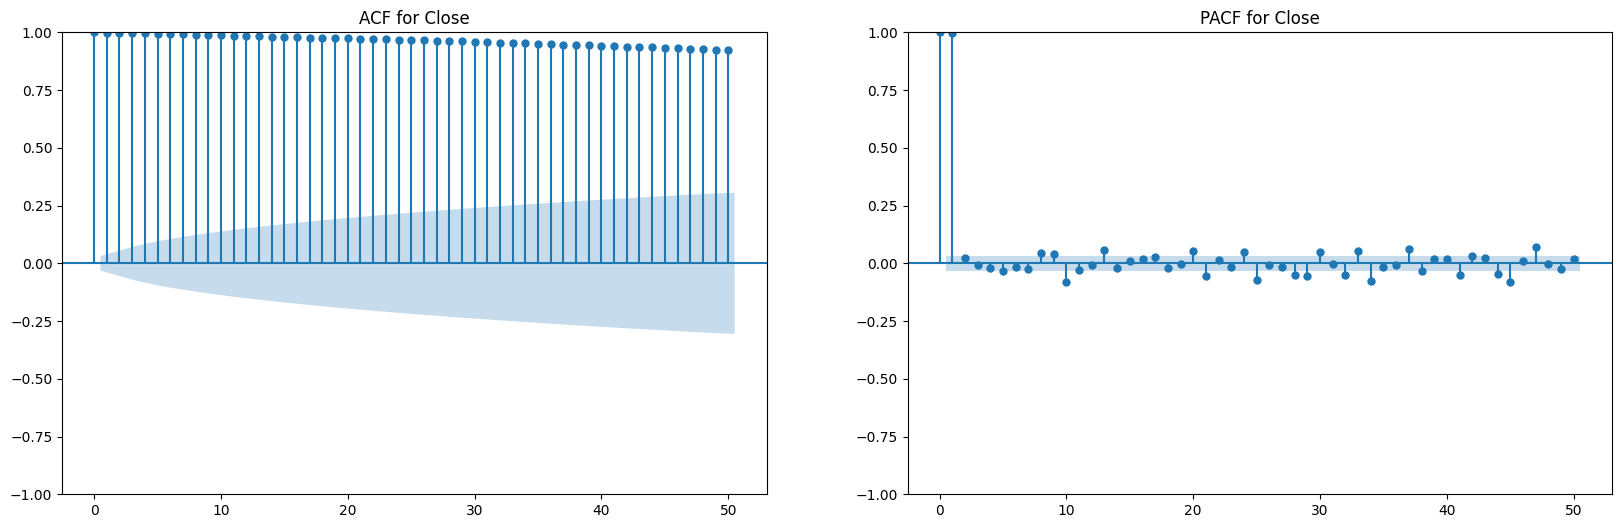

2023-09-20 23:41:42,186 [INFO] - Decomposing the time series
2023-09-20 23:41:43,462 [INFO] - Plot saved to: ts_plots_assets\decompose.png


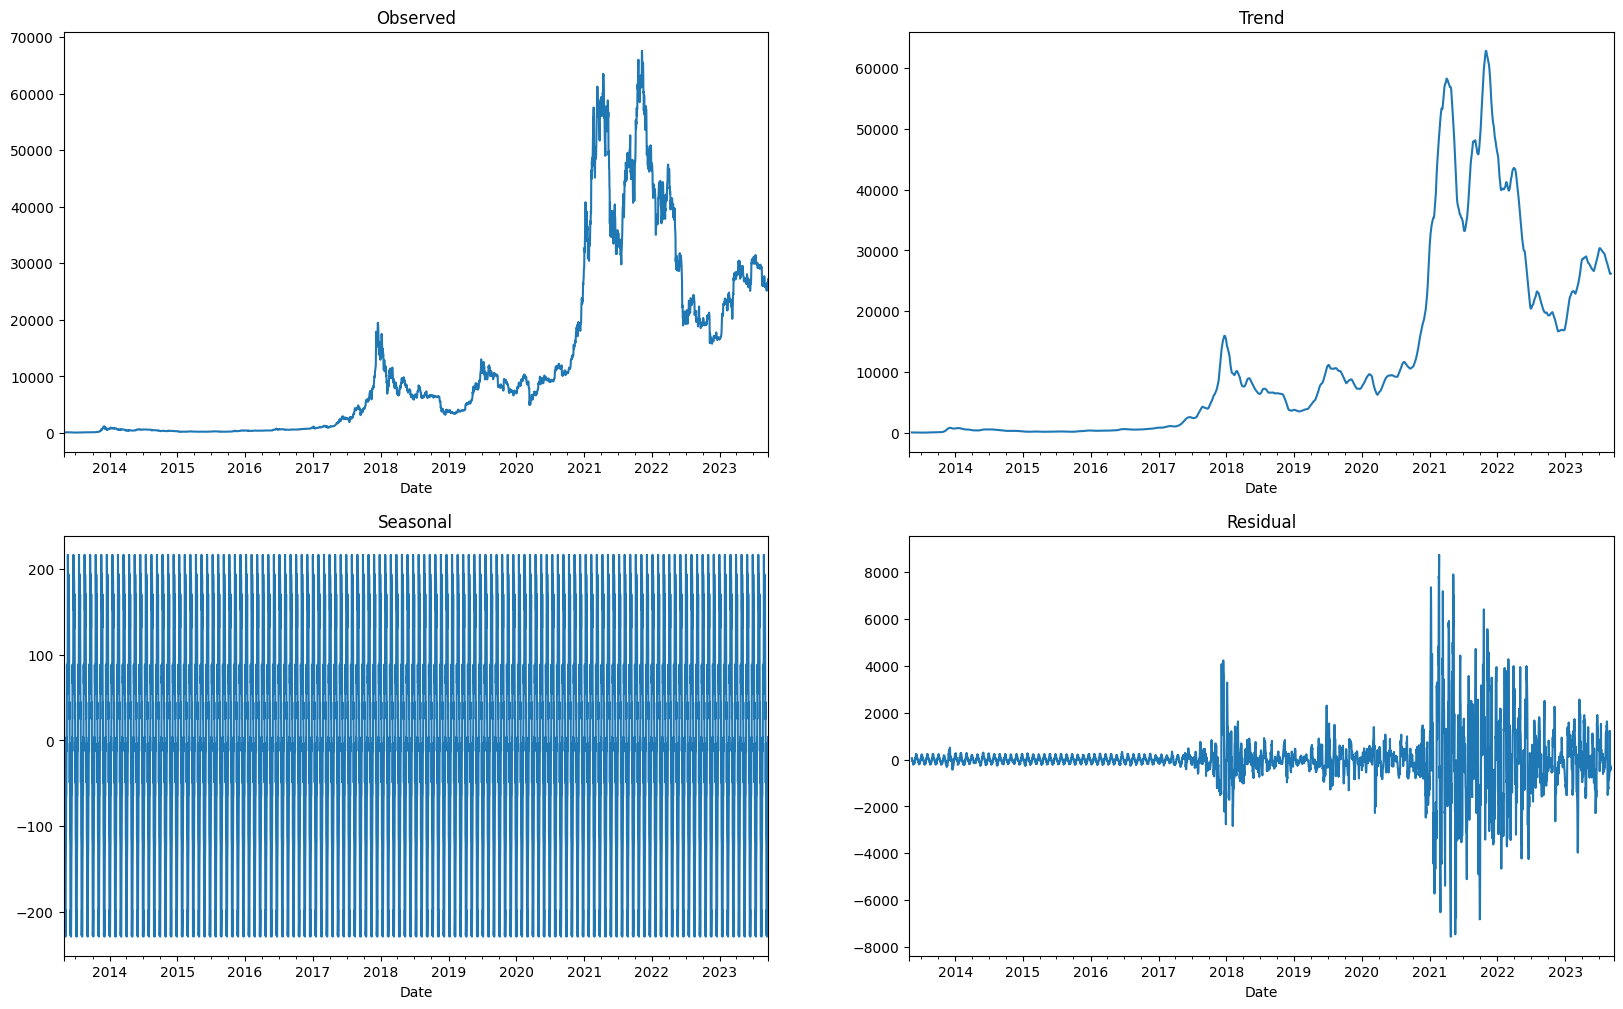

2023-09-20 23:41:44,230 [INFO] - Checking stationarity of the time series
2023-09-20 23:41:44,639 [INFO] - Performing Jarque-Bera test
2023-09-20 23:41:44,644 [INFO] - Jarque-Bera test statistic: 1736.9936978913831 p-value: 0.0 Significance level: 0.05 Reject the null hypothesis: The series likely does not follow a normal distribution.
2023-09-20 23:41:44,647 [INFO] - Performing KPSS test
2023-09-20 23:41:44,649 [INFO] - KPSS test statistic: 6.2224317565897795 p-value: 0.01 Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739} Significance level: 0.05 Reject the null hypothesis: The series is likely stationary.
2023-09-20 23:41:44,650 [INFO] - Performing Kolmogorov-Smirnov test
2023-09-20 23:41:44,653 [INFO] - Kolmogorov-Smirnov test statistic: 1.0 p-value: 0.0 Significance level: 0.05 Reject the null hypothesis: The series likely does not follow the specified distribution.
2023-09-20 23:41:44,655 [INFO] - Checking volatility of the time series
2023-09-20 23:41:44,75

------------------------------------------------------------
ADF Statistic: -1.5929586479279119
p-value: 0.4871296515082403
Critical Values:
	1%: -3.4320871281294227
	5%: -2.8623075675054364
	10%: -2.5671785865904493
The series is likely non-stationary.
------------------------------------------------------------


Jarque-Bera test statistic: 1736.9936978913831
p-value: 0.0
Significance level: 0.05
Reject the null hypothesis: The series likely does not follow a normal distribution.


KPSS test statistic: 6.2224317565897795
p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Significance level: 0.05
Reject the null hypothesis: The series is likely stationary.


Kolmogorov-Smirnov test statistic: 1.0
p-value: 0.0
Significance level: 0.05
Reject the null hypothesis: The series likely does not follow the specified distribution.


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-square

"Lag: 1ssr_ftest: F=2.1590, p=0.1418ssr_chi2test: chi2=2.1607, p=0.1416lrtest: chi2=2.1601, p=0.1416params_ftest: F=2.1590, p=0.1418","Lag: 2ssr_ftest: F=0.1883, p=0.8284ssr_chi2test: chi2=0.3771, p=0.8282lrtest: chi2=0.3771, p=0.8282params_ftest: F=0.1883, p=0.8284","Lag: 3ssr_ftest: F=0.8709, p=0.4553ssr_chi2test: chi2=2.6176, p=0.4544lrtest: chi2=2.6167, p=0.4546params_ftest: F=0.8709, p=0.4553","Lag: 4ssr_ftest: F=1.6678, p=0.1546ssr_chi2test: chi2=6.6869, p=0.1534lrtest: chi2=6.6810, p=0.1537params_ftest: F=1.6678, p=0.1546","Lag: 5ssr_ftest: F=0.8046, p=0.5462ssr_chi2test: chi2=4.0348, p=0.5444lrtest: chi2=4.0326, p=0.5447params_ftest: F=0.8046, p=0.5462","Lag: 6ssr_ftest: F=1.0853, p=0.3686ssr_chi2test: chi2=6.5339, p=0.3661lrtest: chi2=6.5283, p=0.3667params_ftest: F=1.0853, p=0.3686"
"Lag: 7ssr_ftest: F=2.2405, p=0.0284ssr_chi2test: chi2=15.7459, p=0.0275lrtest: chi2=15.7133, p=0.0279params_ftest: F=2.2405, p=0.0284","Lag: 8ssr_ftest: F=1.6880, p=0.0960ssr_chi2test: chi2=13.5650, p=0.0938lrtest: chi2=13.5407, p=0.0945params_ftest: F=1.6880, p=0.0960","Lag: 9ssr_ftest: F=4.9436, p=0.0000ssr_chi2test: chi2=44.7164, p=0.0000lrtest: chi2=44.4545, p=0.0000params_ftest: F=4.9436, p=0.0000","Lag: 10ssr_ftest: F=2.2658, p=0.0123ssr_chi2test: chi2=22.7839, p=0.0116lrtest: chi2=22.7157, p=0.0118params_ftest: F=2.2658, p=0.0123","Lag: 11ssr_ftest: F=2.2730, p=0.0093ssr_chi2test: chi2=25.1555, p=0.0087lrtest: chi2=25.0723, p=0.0089params_ftest: F=2.2730, p=0.0093","Lag: 12ssr_ftest: F=3.7940, p=0.0000ssr_chi2test: chi2=45.8311, p=0.0000lrtest: chi2=45.5558, p=0.0000params_ftest: F=3.7940, p=0.0000"
"Lag: 13ssr_ftest: F=2.8711, p=0.0004ssr_chi2test: chi2=37.5922, p=0.0003lrtest: chi2=37.4067, p=0.0004params_ftest: F=2.8711, p=0.0004","Lag: 14ssr_ftest: F=4.6271, p=0.0000ssr_chi2test: chi2=65.2801, p=0.0000lrtest: chi2=64.7232, p=0.0000params_ftest: F=4.6271, p=0.0000","Lag: 15ssr_ftest: F=4.6337, p=0.0000ssr_chi2test: chi2=70.0792, p=0.0000lrtest: chi2=69.4379, p=0.0000params_ftest: F=4.6337, p=0.0000","Lag: 16ssr_ftest: F=4.7895, p=0.0000ssr_chi2test: chi2=77.3075, p=0.0000lrtest: chi2=76.5278, p=0.0000params_ftest: F=4.7895, p=0.0000","Lag: 17ssr_ftest: F=4.4571, p=0.0000ssr_chi2test: chi2=76.4791, p=0.0000lrtest: chi2=75.7157, p=0.0000params_ftest: F=4.4571, p=0.0000","Lag: 18ssr_ftest: F=4.1626, p=0.0000ssr_chi2test: chi2=75.6681, p=0.0000lrtest: chi2=74.9205, p=0.0000params_ftest: F=4.1626, p=0.0000"
"Lag: 19ssr_ftest: F=4.6496, p=0.0000ssr_chi2test: chi2=89.2629, p=0.0000lrtest: chi2=88.2247, p=0.0000params_ftest: F=4.6496, p=0.0000","Lag: 20ssr_ftest: F=4.4180, p=0.0000ssr_chi2test: chi2=89.3302, p=0.0000lrtest: chi2=88.2902, p=0.0000params_ftest: F=4.4180, p=0.0000","Lag: 21ssr_ftest: F=3.7353, p=0.0000ssr_chi2test: chi2=79.3448, p=0.0000lrtest: chi2=78.5226, p=0.0000params_ftest: F=3.7353, p=0.0000","Lag: 22ssr_ftest: F=3.8050, p=0.0000ssr_chi2test: chi2=84.7201, p=0.0000lrtest: chi2=83.7835, p=0.0000params_ftest: F=3.8050, p=0.0000","Lag: 23ssr_ftest: F=4.1033, p=0.0000ssr_chi2test: chi2=95.5658, p=0.0000lrtest: chi2=94.3758, p=0.0000params_ftest: F=4.1033, p=0.0000","Lag: 24ssr_ftest: F=4.2926, p=0.0000ssr_chi2test: chi2=104.3775, p=0.0000lrtest: chi2=102.9599, p=0.0000params_ftest: F=4.2926, p=0.0000"
"Lag: 25ssr_ftest: F=3.3800, p=0.0000ssr_chi2test: chi2=85.6584, p=0.0000lrtest: chi2=84.7003, p=0.0000params_ftest: F=3.3800, p=0.0000","Lag: 26ssr_ftest: F=3.4068, p=0.0000ssr_chi2test: chi2=89.8393, p=0.0000lrtest: chi2=88.7859, p=0.0000params_ftest: F=3.4068, p=0.0000","Lag: 27ssr_ftest: F=3.7059, p=0.0000ssr_chi2test: chi2=101.5420, p=0.0000lrtest: chi2=100.1986, p=0.0000params_ftest: F=3.7059, p=0.0000","Lag: 28ssr_ftest: F=3.7981, p=0.0000ssr_chi2test: chi2=107.9810, p=0.0000lrtest: chi2=106.4631, p=0.0000params_ftest: F=3.7981, p=0.0000","Lag: 29ssr_ftest: F=4.1056, p=0.0000ssr_chi2test: chi2=120.9562, p=0.0000lrtest: chi2=119.0553, p=0.0000params_ftest: F=4.1056, p=0.0000","Lag: 30ssr_ftest: F=3.8423, p=0.0000ssr

In [15]:
from IPython.core.display import display, HTML

# Instantiate and call methods
tsa = TimeSeriesAnalysis(data, target='Close')

# Store and display the results
autocorr_fig = tsa.check_autocorrelation()
decomposition = tsa.decompose_time_series(show=True)  # Set show=False if you don't want to display the plot

adf_stat, p_value, crit_values = tsa.check_stationarity()
jb_results = tsa.check_jarque_bera(alpha=0.05)
kpss_results = tsa.check_kpss(alpha=0.05)
ks_results = tsa.check_ks_test(alpha=0.05)
volatility_summary = tsa.check_volatility()
granger_results = tsa.test_granger_causality('Open', maxlag=30, verbose=False)
display(HTML(tsa.concise_granger_output_table(granger_results)))


In [16]:
class UnifiedDataPreprocessor:
    """ 
    UnifiedDataPreprocessor is responsible for preprocessing time series data.
    It performs actions like data splitting, normalization, reshaping, and sequence generation.
    
    Attributes:
        data (pd.DataFrame): Original time series data.
        target_column (str): Target column for preprocessing.
        logger (logging.Logger): Logger for tracking operations and debugging.
        transformations (list): List of applied transformations.
    """
    
    def __init__(self, df, target_column, logger=None):
        self.data = df.copy()
        self.target_column = target_column
        self.scalers = {}
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.logger = logger if logger else logging.getLogger(__name__)
        self.transformations = []
        self.scalers = {
            "MinMax": MinMaxScaler(),
            "Standard": StandardScaler(),
            "Robust": RobustScaler(),
            "Quantile": QuantileTransformer(output_distribution='normal'),
            "Power": PowerTransformer(method='yeo-johnson')
        }
        self.logger.info("Initializing DataPreprocessor...")        





    def recheck_statistical_properties(self, tsa):
        """
        Re-run statistical tests to confirm transformation effectiveness.
        
        Parameters:
            tsa (TimeSeriesAnalysis): TimeSeriesAnalysis object for running statistical tests.
        """
        self.logger.info("Rechecking statistical properties after transformations...")
        jb_results = tsa.check_jarque_bera(alpha=0.05)
        kpss_results = tsa.check_kpss(alpha=0.05)
        ks_results = tsa.check_ks_test(alpha=0.05)
        return jb_results, kpss_results, ks_results




In [54]:
class UnifiedDataPreprocessor:
    """ 
    UnifiedDataPreprocessor is responsible for preprocessing time series data.
    It performs actions like data splitting, normalization, reshaping, and sequence generation.
    
    Attributes:
        data (pd.DataFrame): Original time series data.
        target_column (str): Target column for preprocessing.
        logger (logging.Logger): Logger for tracking operations and debugging.
        transformations (list): List of applied transformations.
    """
    
    def __init__(self, df, target_column, logger=None):
        self.data = df.copy()
        self.target_column = target_column
        self.scalers = {}
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.logger = logger if logger else logging.getLogger(__name__)
        self.transformations = []
        self.lambda_val = None  
        self.scalers = {
            "MinMax": MinMaxScaler(),
            "Standard": StandardScaler(),
            "Robust": RobustScaler(),
            "Quantile": QuantileTransformer(output_distribution='normal'),
            "Power": PowerTransformer(method='yeo-johnson')
        }
        self.logger.info("Initializing DataPreprocessor...")        
    
    def get_scaler(self, scaler_type):
        self.logger.info(f"Getting scaler of type: {scaler_type}")
        try:
            return self.scalers[scaler_type]
        except KeyError:
            raise ValueError(f"Invalid scaler_type. Supported types are: {', '.join(self.scalers.keys())}")

    def split_and_plot_data(self, test_size=0.2, split_date=None, plot=True):
        """
        Split the data into training and test sets, and then plot the target variable for both sets.
        :param test_size: float, optional, default 0.2. Represents the proportion of the dataset to include in the test split.
        :param split_date: str, optional, default None. A date string (e.g., '2023-01-01') to split data at a specific date. If provided, this will override test_size.
        """
        self.logger.info("Splitting data...")

        features = self.data.drop(columns=[self.target_column])
        target = self.data[self.target_column]

        if split_date:
            train_mask = self.data.index < split_date
            self.X_train, self.X_test = features[train_mask], features[~train_mask]
            self.y_train, self.y_test = target[train_mask], target[~train_mask]
        else:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                features, target, test_size=test_size, shuffle=False
            )

        self.logger.info(f"Data split completed. X_train shape: {self.X_train.shape}, y_train shape: {self.y_train.shape}")
        print(f"X_train shape: {self.X_train.shape}, y_train shape: {self.y_train.shape}")
        print(f"X_test shape: {self.X_test.shape}, y_test shape: {self.y_test.shape}")

        if plot: # Plotting
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Training Data - Target')
            plt.plot(self.y_train, label=self.target_column)
            plt.xlabel("Time")
            plt.ylabel("Value")
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Test Data - Target')
            plt.plot(self.y_test, label=self.target_column)
            plt.xlabel("Time")
            plt.ylabel("Value")
            plt.legend()
            plt.show()

    def normalize_data(self, scaler_type='MinMax',plot=True):
        self.logger.info("Normalizing feature data...")
        scaler = self.get_scaler(scaler_type)
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
        self.scalers['features'] = scaler
        self.logger.info("Feature data normalization completed.")

        # Plot normalized training and test features
        if plot:
            plt.figure(figsize=(20, 8))
            plt.subplot(1, 2, 1)
            plt.title('Normalized Training Features')
            for i in range(self.X_train.shape[1]):
                plt.plot(self.X_train[:, i], label=f'Feature {i}')
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Normalized Test Features')
            for i in range(self.X_test.shape[1]):
                plt.plot(self.X_test[:, i], label=f'Feature {i}')
            plt.legend()
            plt.show()

    def normalize_target(self, scaler_type='MinMax', plot=True):
        self.logger.info("Normalizing target data...")
        scaler = self.get_scaler(scaler_type)
        self.y_train = scaler.fit_transform(self.y_train.values.reshape(-1, 1))
        self.y_test = scaler.transform(self.y_test.values.reshape(-1, 1))
        self.scalers['target'] = scaler
        self.logger.info("Target data normalization completed.")

        if plot:# Plot normalized training and test targets
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Normalized Training Target')
            plt.plot(self.y_train, label='Normalized ' + self.target_column)
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Normalized Test Target')
            plt.plot(self.y_test, label='Normalized ' + self.target_column)
            plt.legend()
            plt.show()
  
    def difference_and_plot_data(self, interval=1,plot=True):
        """
        Apply differencing to the data and then plot it.

        Parameters:
            interval (int): The interval between differencing. Default is 1.
        """
        self.logger.info(f"Applying differencing with interval {interval}...")
        self.data = self.data.diff(periods=interval).dropna()
        self.transformations.append('Differencing')
        self.logger.info("Differencing applied.")
        if plot:
            plt.figure(figsize=(20, 7))
            plt.title('Data after Differencing')
            plt.plot(self.data[self.target_column], label=self.target_column)
            plt.legend()
            plt.show()
        
    def box_cox_transform_and_plot(self, lambda_val=None,plot=True):
        if self.y_train is None or self.y_test is None:
            self.logger.warning("Data not split yet. Run split_data first.")
            return self  # Allow method chaining

        if np.any(self.y_train <= 0) or np.any(self.y_test <= 0):
            self.logger.warning("Data must be positive for Box-Cox transformation.")
            return self  # Allow method chaining

        self.logger.info("Applying Box-Cox transformation...")
        self.y_train = self.y_train.ravel()
        self.y_test = self.y_test.ravel()
        self.y_train, fitted_lambda = boxcox(self.y_train)
        self.lambda_val = fitted_lambda if lambda_val is None else lambda_val
        self.y_test = boxcox(self.y_test, lmbda=self.lambda_val)
        self.logger.info(f"Box-Cox transformation applied with lambda {self.lambda_val}.")

        if plot:# Plotting only the target variable
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Box-Cox Transformed Training Target')
            plt.plot(self.y_train, label='Transformed ' + self.target_column)
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Box-Cox Transformed Test Target')
            plt.plot(self.y_test, label='Transformed ' + self.target_column)
            plt.legend()
            plt.show()

    def inverse_box_cox_and_plot(self,plot=True):
        if f'Box-Cox on {self.target_column}' not in self.transformations:
            self.logger.warning("No Box-Cox transformation found on the target column. Skipping inverse transformation.")
            return

        self.logger.info("Applying inverse Box-Cox transformation...")
        self.y_train = invboxcox(self.y_train, self.lambda_val)
        self.y_test = invboxcox(self.y_test, self.lambda_val)
        self.transformations.remove(f'Box-Cox on {self.target_column}')
        self.logger.info(f"Inverse Box-Cox transformation applied on column {self.target_column}.")
        
        if plot:
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 2, 1)
            plt.title('Inverse Box-Cox Transformed Training Target')
            plt.plot(self.y_train, label='Inverse Transformed ' + self.target_column)
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.title('Inverse Box-Cox Transformed Test Target')
            plt.plot(self.y_test, label='Inverse Transformed ' + self.target_column)
            plt.legend()
            plt.show()
        
        
        
        
        
        
        
        
        
        
        
        
        
        
    def reshape_for_recurrent(self, data):
        self.logger.info("Reshaping data for recurrent models...")
        reshaped_data = data.reshape(data.shape)
        self.logger.info(f"Data reshaped to {reshaped_data.shape}.")
        return reshaped_data

    def generate_sequences(self, X_data, y_data, n_steps, seq_to_seq=False):
        X, y = [], []
        for i in range(len(X_data) - n_steps):
            seq_x = X_data[i:i + n_steps, :]
            if seq_to_seq:
                seq_y = y_data[i:i + n_steps, :]
            else:
                seq_y = y_data[i + n_steps - 1]
            X.append(seq_x)
            y.append(seq_y)
        self.logger.info(f"Generated {len(X)} sequences of shape {X[0].shape}.")
        return np.array(X), np.array(y)
    
    def prepare_data_for_recurrent(self, n_steps, seq_to_seq=False):
        self.logger.info(f"Preparing data for recurrent models with {n_steps} timesteps...")
        X_train_seq, y_train_seq = self.generate_sequences(self.X_train, self.y_train, n_steps, seq_to_seq)
        X_test_seq, y_test_seq = self.generate_sequences(self.X_test, self.y_test, n_steps, seq_to_seq)
        X_train_seq = self.reshape_for_recurrent(X_train_seq)
        X_test_seq = self.reshape_for_recurrent(X_test_seq)
        self.logger.info("Data preparation for recurrent models completed.")
        return X_train_seq, y_train_seq, X_test_seq, y_test_seq

    def prepare_for_prophet(self):
        """Prepare data for Prophet model."""
        prophet_data = self.data[[self.target_column]].reset_index()
        prophet_data.columns = ['ds', 'y']
        return prophet_data

    def get_preprocessed_data(self):
        """Get preprocessed data."""
        return self.X_train, self.y_train, self.X_test, self.y_test


In [55]:
df = data_c['BTC'].copy()

2023-09-21 01:44:07,472 [INFO] - Initializing TimeSeriesAnalysis class
2023-09-21 01:44:07,474 [INFO] - Initializing DataPreprocessor...
2023-09-21 01:44:07,479 [INFO] - Splitting data...
2023-09-21 01:44:07,483 [INFO] - Data split completed. X_train shape: (3037, 5), y_train shape: (3037,)


X_train shape: (3037, 5), y_train shape: (3037,)
X_test shape: (760, 5), y_test shape: (760,)


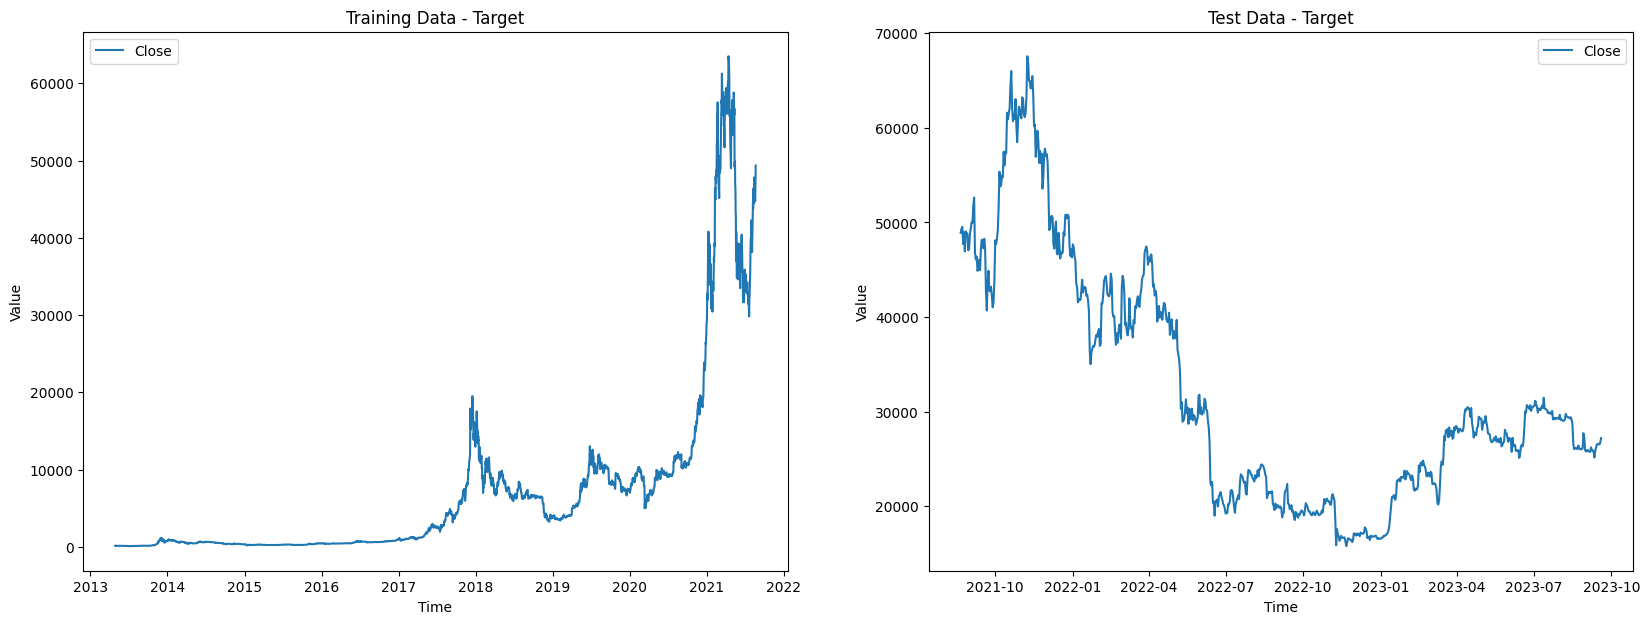

2023-09-21 01:44:07,982 [INFO] - Normalizing feature data...
2023-09-21 01:44:07,984 [INFO] - Getting scaler of type: MinMax
2023-09-21 01:44:08,000 [INFO] - Feature data normalization completed.
2023-09-21 01:44:08,001 [INFO] - Normalizing target data...
2023-09-21 01:44:08,004 [INFO] - Getting scaler of type: MinMax
2023-09-21 01:44:08,006 [INFO] - Target data normalization completed.
2023-09-21 01:44:08,008 [INFO] - Preparing data for recurrent models with 10 timesteps...
2023-09-21 01:44:08,012 [INFO] - Generated 3027 sequences of shape (10, 5).
2023-09-21 01:44:08,031 [INFO] - Generated 750 sequences of shape (10, 5).
2023-09-21 01:44:08,037 [INFO] - Reshaping data for recurrent models...
2023-09-21 01:44:08,038 [INFO] - Data reshaped to (3027, 10, 5).
2023-09-21 01:44:08,041 [INFO] - Reshaping data for recurrent models...
2023-09-21 01:44:08,042 [INFO] - Data reshaped to (750, 10, 5).
2023-09-21 01:44:08,043 [INFO] - Data preparation for recurrent models completed.
2023-09-21 01:

X_train shape: (3037, 5), y_train shape: (3037,)
X_test shape: (760, 5), y_test shape: (760,)
X_train shape: (3037, 5), y_train shape: (3037,)
X_test shape: (760, 5), y_test shape: (760,)
X_train shape: (3037, 5), y_train shape: (3037,)
X_test shape: (760, 5), y_test shape: (760,)


In [58]:
# LSTM Sequece-to-One
tsa = TimeSeriesAnalysis(df, target='Close')
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2)
d_preprocessor.normalize_data(scaler_type='MinMax',plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax',plot=False)
n_steps = 10 
X_train_seq, y_train_seq, X_test_seq, y_test_seq = d_preprocessor.prepare_data_for_recurrent(n_steps, seq_to_seq=False)

# LSTM Sequece-to-Sequence
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
d_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax', plot=False)
n_steps = 10 
X_train_seq1, y_train_seq1, X_test_seq1, y_test_seq1 = d_preprocessor.prepare_data_for_recurrent(n_steps, seq_to_seq=True)

# For Linear Regression
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
d_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax', plot=False)
X_train_lr, y_train_lr, X_test_lr, y_test_lr = d_preprocessor.get_preprocessed_data()

# For XGBoost 
d_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
d_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
d_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
d_preprocessor.normalize_target(scaler_type='MinMax', plot=False)
X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb = d_preprocessor.get_preprocessed_data()

In [57]:
print("LSTM Sequence-to-One Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

print("LSTM Sequence-to-Sequence Data Shapes:")
print("X_train_seq:", X_train_seq1.shape)
print("y_train_seq:", y_train_seq1.shape)
print("X_test_seq:", X_test_seq1.shape)
print("y_test_seq:", y_test_seq1.shape)
print("----")

print("LR Data Shapes:")
print("X_train_lr:", X_train_lr.shape)
print("y_train_lr:", y_train_lr.shape)
print("X_test_lr:", X_test_lr.shape)
print("y_test_lr:", y_test_lr.shape)
print("----")


print("XGB Data Shapes:")
print("X_train_xgb:", X_train_xgb.shape)
print("y_train_xgb:", y_train_xgb.shape)
print("X_test_xgb:", X_test_xgb.shape)
print("y_test_xgb:", y_test_xgb.shape)
print("----")

LSTM Sequence-to-One Data Shapes:
X_train_seq: (3027, 10, 5)
y_train_seq: (3027, 1)
X_test_seq: (750, 10, 5)
y_test_seq: (750, 1)
----
LSTM Sequence-to-Sequence Data Shapes:
X_train_seq: (3027, 10, 5)
y_train_seq: (3027, 10, 1)
X_test_seq: (750, 10, 5)
y_test_seq: (750, 10, 1)
----
LR Data Shapes:
X_train_lr: (3037, 5)
y_train_lr: (3037, 1)
X_test_lr: (760, 5)
y_test_lr: (760, 1)
----
XGB Data Shapes:
X_train_xgb: (3037, 5)
y_train_xgb: (3037, 1)
X_test_xgb: (760, 5)
y_test_xgb: (760, 1)
----


In [73]:
class Enhanced_Linear_Regression:
    """
    Initialize the Enhanced_Linear_Regression model.
    Supports Ridge and Lasso regularization.
    """
    def __init__(self, config, data_preprocessor, plot=True):
        self.config = config
        self.data = data_preprocessor.data
        self.X_train = data_preprocessor.X_train
        self.y_train = data_preprocessor.y_train
        self.X_test = data_preprocessor.X_test
        self.y_test = data_preprocessor.y_test
        self.feature_scaler = data_preprocessor.scalers['features']
        self.target_scaler = data_preprocessor.scalers['target']
        self.plot = plot

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)
        
        self._initialize_model()

    def _validate_input(self, X_train, y_train, X_test, y_test):
        """Validate the shape and type of training and testing data."""
        for arr, name in [(X_train, 'X_train'), (y_train, 'y_train'), (X_test, 'X_test'), (y_test, 'y_test')]:
            if not isinstance(arr, np.ndarray) or len(arr.shape) != 2:
                raise ValueError(f"{name} should be a 2D numpy array.")

    def _initialize_model(self):
        """Choose the regression model based on the configuration."""
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """Train the Linear Regression model."""
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """Make predictions using the trained model for training and test sets."""
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully.")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """Inverse scale the predictions to the original scale using the target_scaler."""
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)
            self.logger.info("Predictions inverse transformed to original scale.")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """Create dataframes comparing the original and predicted values for both training and test sets."""
        try:
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values

            train_comparison_df = pd.DataFrame({'Original': train_indices, 'Predicted': self.train_predictions.ravel()})
            test_comparison_df = pd.DataFrame({'Original': test_indices, 'Predicted': self.test_predictions.ravel()})

            train_date_index = self.data.index[:len(self.y_train)]
            test_date_index = self.data.index[-len(self.y_test):]

            train_comparison_df.set_index(train_date_index, inplace=True)
            test_comparison_df.set_index(test_date_index, inplace=True)

            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """Evaluate the model using various metrics for both training and test sets."""
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {metric_name: metric_func(comparison_df['Original'], comparison_df['Predicted']) for metric_name, metric_func in metrics.items()}
                results.append(dataset_results)

            results_df = pd.DataFrame(results, index=['Train', 'Test'])
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """Plot the original vs predicted values for both training and testing data."""
        if not self.plot:
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        train_comparison_df, test_comparison_df = self.compare_predictions()

        ax1.plot(train_comparison_df.index, train_comparison_df['Original'], label='Actual')
        ax1.plot(train_comparison_df.index, train_comparison_df['Predicted'], label='Predicted', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        ax2.plot(test_comparison_df.index, test_comparison_df['Original'], label='Actual')
        ax2.plot(test_comparison_df.index, test_comparison_df['Predicted'], label='Predicted', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version, folder_name="asset_models"):
        """Save the trained model to a folder with a naming convention."""
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)

        dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


In [74]:
from IPython.display import display
# Initialize UnifiedDataPreprocessor
data_preprocessor = UnifiedDataPreprocessor(df, target_column='Close')
data_preprocessor.split_and_plot_data(test_size=0.2, plot=False)
data_preprocessor.normalize_data(scaler_type='MinMax', plot=False)
data_preprocessor.normalize_target(scaler_type='MinMax', plot=False)

config = {
    'regularization': 'ridge',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

# Initialize model with plotting set to True (or False if you don't want plots)
model = Enhanced_Linear_Regression(config, data_preprocessor, plot=False)

# The rest remains the same
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()  # This will obey the plotting=True/False flag set during initialization
model.save_model_to_folder(version="final")

2023-09-23 15:17:56,308 [INFO] - Initializing DataPreprocessor...
2023-09-23 15:17:56,308 [INFO] - Splitting data...
2023-09-23 15:17:56,313 [INFO] - Data split completed. X_train shape: (3037, 5), y_train shape: (3037,)
2023-09-23 15:17:56,314 [INFO] - Normalizing feature data...
2023-09-23 15:17:56,315 [INFO] - Getting scaler of type: MinMax
2023-09-23 15:17:56,318 [INFO] - Feature data normalization completed.
2023-09-23 15:17:56,319 [INFO] - Normalizing target data...
2023-09-23 15:17:56,322 [INFO] - Getting scaler of type: MinMax
2023-09-23 15:17:56,324 [INFO] - Target data normalization completed.
2023-09-23 15:17:56,325 [INFO] - Ridge regression model initialized.
2023-09-23 15:17:56,327 [INFO] - Linear Regression model trained successfully.
2023-09-23 15:17:56,334 [INFO] - Predictions made successfully.
2023-09-23 15:17:56,336 [INFO] - Predictions inverse transformed to original scale.


X_train shape: (3037, 5), y_train shape: (3037,)
X_test shape: (760, 5), y_test shape: (760,)


,Original,Predicted
Date,,
2021-08-21,48905.490,49166.238
2021-08-22,49321.650,49081.258
2021-08-23,49546.150,49724.442
2021-08-24,47706.120,48728.906
2021-08-25,48960.790,48434.897
...,...,...
2023-09-15,26608.690,26936.315
2023-09-16,26568.280,26968.270
2023-09-17,26534.190,26907.876


,Original,Predicted
Date,,
2013-04-28,127.950,195.505
2013-04-29,144.540,204.895
2013-04-30,139.000,205.687
2013-05-01,116.990,192.391
2013-05-02,105.210,178.368
...,...,...
2021-08-16,46004.480,46734.414
2021-08-17,44695.360,45616.288
2021-08-18,44801.190,45064.986


,RMSE,R2 Score,MAE,Explained Variance
Train,284.135,0.999,132.644,0.999
Test,562.085,0.998,428.507,0.998


2023-09-23 15:17:56,360 [INFO] - Model saved to asset_models\LR_Vfinal_20230923_151756.joblib


In [ ]:
class Enhanced_Linear_Regression:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data, plot=True):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        # Setting up logging
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Choose the regression model based on config
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """
        Train the Linear Regression model.
        """
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """
        Make predictions using the trained Linear Regression model for both training and test data.
        """
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """
        Inverse scale the predictions to original scale using the target_scaler.
        """
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """
        Evaluate the model using various metrics and return the results for both training and test datasets.
        """
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            self.logger.info("Model evaluated successfully.")
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        if not self.plot
            return
            fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

            # Training Data Plot
            ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
            ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
            ax1.set_title('Training Data: Actual vs Predicted')
            ax1.legend()
            # Testing Data Plot
            ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
            ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
            ax2.set_title('Testing Data: Actual vs Predicted')
            ax2.legend()
            plt.tight_layout()
            plt.show()

    def save_model_to_folder(self, version):
        """
        Save the trained model to the specified folder with a naming convention.

        Args:
        - version (str): Version of the model.
        """
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


In [ ]:
from IPython.display import display
config = {
    'regularization': 'ridge',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()
model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 6 - Unified Time Series

In [ ]:
class UnifiedDataPreprocessor:

    def __init__(self, df, target_column, logger=None):
        self.data = df.copy()
        self.target_column = target_column
        self.scalers = {}
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.logger = logger if logger else logging.getLogger(__name__)
        self.logger.info("Initializing DataPreprocessor...")
        self.split_data()

    def split_data(self, test_size=0.2, split_date=None):
        """
        Split the data into training and test sets.
        :param test_size: float, optional, default 0.2. Represents the proportion of the dataset to include in the test split.
        :param split_date: str, optional, default None. A date string (e.g., '2023-01-01') to split data at a specific date. If provided, this will override test_size.
        """
        self.logger.info("Splitting data...")

        features = self.data.drop(columns=[self.target_column])
        target = self.data[self.target_column]

        if split_date:
            train_mask = self.data.index < split_date
            self.X_train, self.X_test = features[train_mask], features[~train_mask]
            self.y_train, self.y_test = target[train_mask], target[~train_mask]
        else:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                features, target, test_size=test_size, shuffle=False
            )
        self.logger.info(f"Data split completed. X_train shape: {self.X_train.shape}, y_train shape: {self.y_train.shape}")

    def get_scaler(self, scaler_type):
        self.logger.info(f"Getting scaler of type: {scaler_type}")
        scalers = {
            "MinMax": MinMaxScaler(),
            "Standard": StandardScaler(),
            "Robust": RobustScaler(),
            "Quantile": QuantileTransformer(output_distribution='normal'),
            "Power": PowerTransformer(method='yeo-johnson')
        }

        try:
            return scalers[scaler_type]
        except KeyError:
            raise ValueError(f"Invalid scaler_type. Supported types are: {', '.join(scalers.keys())}")

    def normalize_data(self, scaler_type='MinMax'):
        self.logger.info("Normalizing feature data...")
        scaler = self.get_scaler(scaler_type)
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
        self.scalers['features'] = scaler
        self.logger.info("Feature data normalization completed.")

    def normalize_target(self, scaler_type='MinMax'):
        self.logger.info("Normalizing target data...")
        scaler = self.get_scaler(scaler_type)
        self.y_train = scaler.fit_transform(self.y_train.values.reshape(-1, 1))
        self.y_test = scaler.transform(self.y_test.values.reshape(-1, 1))
        self.scalers['target'] = scaler
        self.logger.info("Target data normalization completed.")

    def reshape_for_recurrent(self, data):
        self.logger.info("Reshaping data for recurrent models...")
        reshaped_data = data.reshape((data.shape[0], data.shape[1], data.shape[2]))
        self.logger.info(f"Data reshaped to {reshaped_data.shape}.")
        return reshaped_data

    def generate_sequences(self, X_data, y_data, n_steps):
        X, y = [], []
        for i in range(len(X_data) - n_steps):
            seq_x = X_data[i:i + n_steps, :]
            seq_y = y_data[i + n_steps - 1]
            X.append(seq_x)
            y.append(seq_y)
        self.logger.info(f"Generated {len(X)} sequences of shape {X[0].shape}.")
        return np.array(X), np.array(y)

    def prepare_data_for_recurrent(self, n_steps):
        self.logger.info(f"Preparing data for recurrent models with {n_steps} timesteps...")
        X_train_seq, y_train_seq = self.generate_sequences(self.X_train, self.y_train, n_steps)
        X_test_seq, y_test_seq = self.generate_sequences(self.X_test, self.y_test, n_steps)
        X_train_seq = self.reshape_for_recurrent(X_train_seq)
        X_test_seq = self.reshape_for_recurrent(X_test_seq)
        self.logger.info("Data preparation for recurrent models completed.")
        return X_train_seq, y_train_seq, X_test_seq, y_test_seq

    def prepare_for_prophet(self):
        prophet_data = self.data[[self.target_column]].reset_index()
        prophet_data.columns = ['ds', 'y']
        return prophet_data

    def get_preprocessed_data(self):
        return self.X_train, self.y_train, self.X_test, self.y_test


In [ ]:
# Initialize the DataPreprocessor
preprocessor = DataPreprocessor(data, 'Close')

# --- For Linear Regression, XGBoost, and LightGBM ---
# Normalize the data (using MinMaxScaler as an example)
preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Retrieve the preprocessed data
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()

# Print the shapes
print("Linear Regression, XGBoost, and LightGBM Data Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("----")

# --- For Prophet ---
prophet_data = preprocessor.prepare_for_prophet()

# Print the shape
print("Prophet Data Shape:", prophet_data.shape)
print("----")

# --- For LSTM ---
# Define the sequence length and prepare data in sequences
n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")


In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Get preprocessed data and scalers
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()
feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_Linear_Regression

In [ ]:
class Enhanced_Linear_Regression:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        # Setting up logging
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Choose the regression model based on config
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """
        Train the Linear Regression model.
        """
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """
        Make predictions using the trained Linear Regression model for both training and test data.
        """
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """
        Inverse scale the predictions to original scale using the target_scaler.
        """
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """
        Evaluate the model using various metrics and return the results for both training and test datasets.
        """
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            self.logger.info("Model evaluated successfully.")
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        """
        Save the trained model to the specified folder with a naming convention.

        Args:
        - version (str): Version of the model.
        """
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


In [ ]:
from IPython.display import display
config = {
    'regularization': 'ridge',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()
model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 8 - Enhanced_XGBoost

In [ ]:
class Enhanced_XGBoost:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize XGBoost model with given or default parameters
        self.model = xgb.XGBRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("XGBoost model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()


    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"XGB_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")

In [ ]:
from IPython.display import display
xgb_config = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5
}

xgb_model = Enhanced_XGBoost(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
xgb_model.train_model()
xgb_model.make_predictions()
xgb_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = xgb_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = xgb_model.evaluate_model()
display(evaluation_results)
xgb_model.plot_predictions()
xgb_model.save_model_to_folder(version="final")


In [ ]:
stop

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import contextlib
import io

# Fine parameter grid
fine_param_grid = {
    'n_estimators': [40, 50, 60],  # around 50
    'learning_rate': [0.05, 0.1, 0.15],  # around 0.1
    'max_depth': [5, 6, 7],  # around 6
    'min_child_weight': [1, 2, 3],  # around 1
    'gamma': [0, 0.1],  # close to 0
    'subsample': [0.5, 0.6, 0.7],  # around 0.6
    'colsample_bytree': [0.5, 0.6, 0.7],  # around 0.6
    'reg_alpha': [0.01, 0.05, 0.1],  # around 0.05
    'reg_lambda': [0.01, 0.05, 0.1]  # around 0.05
}

model = xgb.XGBRegressor(objective='reg:squarederror', nthread=-1)

# Capturing verbose output for Jupyter Notebook cell
buffer = io.StringIO()

# Randomized Search
with contextlib.redirect_stdout(buffer):
    coarse_search = RandomizedSearchCV(
        model, fine_param_grid, n_iter=100, scoring='neg_mean_squared_error', 
        verbose=10, n_jobs=-1, cv=5
    )
    coarse_search.fit(X_train, y_train)

output = buffer.getvalue()
print(output)
print("Best Parameters (Randomized Search): ", coarse_search.best_params_)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    model,
    fine_param_grid,
    scoring='neg_mean_squared_error',
    n_iter=100,
    n_jobs=-1,
    cv=5,
    verbose=10
)

bayes_search.fit(X_train, y_train)
print("Best Parameters (Bayesian): ", bayes_search.best_params_)


In [ ]:
#!pip install scikit-optimize
print("hello")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 9 - Enhanced_LightGBM

In [ ]:
class Enhanced_LightGBM:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize LightGBM model with given or default parameters
        self.model = LGBMRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("LightGBM model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).ravel()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).ravel()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            results_df = pd.DataFrame(results, index=['Train', 'Test'])
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LGBM_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


In [ ]:
from IPython.display import display

lgbm_config = {
    'objective': 'regression',
    'learning_rate': 0.1,
    'n_estimators': 100,
    'max_depth': 5
}

lgbm_model = Enhanced_LightGBM(lgbm_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
lgbm_model.train_model()
lgbm_model.make_predictions()
lgbm_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = lgbm_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = lgbm_model.evaluate_model()
display(evaluation_results)
lgbm_model.plot_predictions()
lgbm_model.save_model_to_folder(version="final")


# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_SVM

In [ ]:
class Enhanced_SVM:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_SVM model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize SVM model with given or default parameters
        self.model = SVR(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # ravel() is used to convert y_train to 1D for SVM
            self.logger.info("SVM model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"SVM_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


In [ ]:
# Sample usage:
svm_config = {
    'kernel': 'rbf',
    'C': 1.0,
    'epsilon': 0.1
}

svm_model = Enhanced_SVM(svm_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
svm_model.train_model()
svm_model.make_predictions()
svm_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = svm_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = svm_model.evaluate_model()
display(evaluation_results)
svm_model.plot_predictions()
svm_model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_KNN

In [ ]:
class Enhanced_KNN:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_KNN model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize KNN model with given or default parameters
        self.model = KNeighborsRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # ravel() is used to convert y_train to 1D for KNN
            self.logger.info("KNN model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"KNN_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")


In [ ]:
from IPython.display import display

# Configuration for KNN
knn_config = {
    'n_neighbors': 5,  # Number of neighbors to use
    'weights': 'uniform',  # Weight function used in prediction
    'algorithm': 'auto'  # Algorithm used to compute the nearest neighbors
}

# Instantiate the Enhanced_KNN model
knn_model = Enhanced_KNN(knn_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
knn_model.train_model()
knn_model.make_predictions()
knn_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = knn_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = knn_model.evaluate_model()
display(evaluation_results)
knn_model.plot_predictions()
knn_model.save_model_to_folder(version="final")

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 7 - Enhanced_RandomForest

In [ ]:

class Enhanced_RandomForest:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_RandomForest model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        # Initialize RandomForest model with given or default parameters
        self.model = RandomForestRegressor(**self.config)

    def train_model(self):
        try:
            self.model.fit(self.X_train, self.y_train.ravel())  # Using ravel() to fit the expected shape
            self.logger.info("RandomForest model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1)).flatten()
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1)).flatten()
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"RF_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")



In [ ]:
from IPython.display import display

# Configuration for RandomForest
rf_config = {
    'n_estimators': 100,  # Number of trees in the forest
    'criterion': 'poisson',  # Function to measure the quality of a split
    'max_depth': None  # The maximum depth of the tree
}

# Instantiate the Enhanced_RandomForest model
rf_model = Enhanced_RandomForest(rf_config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
rf_model.train_model()
rf_model.make_predictions()
rf_model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = rf_model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = rf_model.evaluate_model()
display(evaluation_results)
rf_model.plot_predictions()
rf_model.save_model_to_folder(version="final")

In [ ]:
stop

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block X - LSTM Class

In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [34]:
class LSTM_Models:
    def __init__(self, input_shape, units, dropout, dense_units, optimizer, feature_scaler, target_scaler,
                 X_train, y_train, X_test, y_test, data, cross_val=False):
        logging.info("Initializing LSTM model")

        self.model = Sequential()
        for i, unit in enumerate(units):
            return_sequences = True if i < len(units) - 1 else False
            self.model.add(LSTM(units=unit, input_shape=input_shape, return_sequences=return_sequences))
            self.model.add(Dropout(dropout))
        self.model.add(Dense(units=dense_units))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        self.params = {
            'input_shape': input_shape,
            'units': units,
            'dropout': dropout,
            'dense_units': dense_units,
            'optimizer': optimizer
        }

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info("Training LSTM model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions with LSTM model")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                 'Predicted': self.train_predictions.squeeze()})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                'Predicted': self.test_predictions.squeeze()})
        logging.info("Predictions made")

    def evaluate_model(self):
        logging.info("Evaluating LSTM model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"LSTM_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [35]:
# After preparing your data with the DataPreprocessing class...
lstm_model = LSTM_Models(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                         units=[256, 128, 64],
                         dropout=0.2,
                         dense_units=1,
                         optimizer='adam',
                         feature_scaler=feature_scaler,
                         target_scaler=target_scaler,
                         X_train=X_train_seq,
                         y_train=y_train_seq,
                         X_test=X_test_seq,
                         y_test=y_test_seq,
                         data=preprocessor.data,
                         cross_val=False)


NameError: name 'scaler' is not defined

In [ ]:
lstm_model.train_model(epochs=100, batch_size=32, early_stopping=True)
lstm_model.save_model()  # save the model
lstm_model.make_predictions()
lstm_model.evaluate_model()
lstm_model.plot_history()
lstm_model.plot_predictions()

In [ ]:
# After preparing your data with the DataPreprocessing class...
lstm_model1 = LSTM_Models(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                         units=[256],
                         dropout=0.2,
                         dense_units=1,
                         optimizer='adam',
                         feature_scaler=feature_scaler,  # Updated from scaler=preprocessor.scaler
                         target_scaler=target_scaler,    # Newly added
                         X_train=X_train_seq,
                         y_train=y_train_seq,
                         X_test=X_test_seq,
                         y_test=y_test_seq,
                         data=preprocessor.data,         # Newly added
                         cross_val=False)

In [ ]:
lstm_model1.train_model(epochs=100, batch_size=32, early_stopping=True)
lstm_model1.save_model()  # Note: changed from lstm_model.save_model()
lstm_model1.make_predictions()
lstm_model1.evaluate_model()
lstm_model1.plot_history()
lstm_model1.plot_predictions()


In [ ]:
stop

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block X - Enhanced_LSTM Class

In [ ]:
class Enhanced_LSTM:
    def __init__(self, model_type, input_shape, units, dropout, dense_units, optimizer,
                 feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing {model_type} model")

        self.model = Sequential()

        # Add specific architecture based on model_type
        if model_type == 'GRU' or model_type == 'LSTM':
            for i, unit in enumerate(units):
                return_sequences = True if i < len(units) - 1 else False
                if model_type == 'GRU':
                    self.model.add(GRU(units=unit, input_shape=input_shape, return_sequences=return_sequences))
                else:
                    self.model.add(LSTM(units=unit, input_shape=input_shape, return_sequences=return_sequences))
                self.model.add(Dropout(dropout))

        elif model_type == 'CNN-LSTM':
            self.model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
            self.model.add(Dropout(dropout))
            self.model.add(LSTM(units=units[0]))

        self.model.add(Dense(units=dense_units))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        # Parameters for saving the model
        self.params = {
            'model_type': model_type,
            'input_shape': input_shape,
            'units': units,
            'dropout': dropout,
            'dense_units': dense_units,
            'optimizer': optimizer
        }

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                 'Predicted': self.train_predictions.squeeze()})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                'Predicted': self.test_predictions.squeeze()})
        logging.info("Predictions made")

    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train, y_train, X_test, y_test = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
model = Enhanced_LSTM(
    model_type='LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single layer with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)


model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50, 50],  # Three layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='GRU',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single layer with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='GRU',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50],  # Two layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='CNN-LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50],  # Single LSTM layer with 50 units after CNN
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model = Enhanced_LSTM(
    model_type='CNN-LSTM',
    input_shape=(X_train.shape[1], X_train.shape[2]),
    units=[50, 50, 50],  # Three layers, each with 50 units
    dropout=0.2,
    dense_units=1,
    optimizer='adam',
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data
)
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()
model.evaluate_model()
model.plot_history()
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 5 - LSTM HyperTunning Grid-Search

In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
import logging
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner import HyperModel
from kerastuner.tuners import BayesianOptimization
import tensorflow as tf

In [ ]:

class EnhancedLSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               recurrent_dropout=hp.Float('recurrent_dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05),
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            model.add(BatchNormalization())

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [ ]:
# Sample code to run the Bayesian Optimization
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape)
tuner = BayesianOptimization(
    hypermodel,
    objective='val_loss',
    max_trials=100,
    directory='bayesian_optimization',
    project_name='lstm'
)

# Callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Start the search
tuner.search(X_train_lstm, y_train_lstm, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback, lr_schedule])


In [ ]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt

class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):
        
        logging.info(f"Initializing LSTM model")
        
        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
             # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        self.train_predictions = self.model.predict(self.X_train)
        self.test_predictions = self.model.predict(self.X_test)

        # Unscaled the predictions
        self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions)
        self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions)

        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train)[:, 0], 
                                                 'Predicted': self.train_predictions[:, 0]})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test)[:, 0], 
                                                'Predicted': self.test_predictions[:, 0]})
        logging.info("Predictions made")


    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a hash from the params
        params_string = str(self.params).encode('utf-8')
        params_hash = hashlib.md5(params_string).hexdigest()

        # Create a model name based on the parameters hash
        model_name = f"{self.params['model_type']}_model_{params_hash}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
config = {
    'model_type': 'LSTM',
    'num_layers': 4, 
    'units_0': 128, 'recurrent_dropout_0': 0.05, 'activation_0': 'sigmoid', 'regularizer_0': 'l2', 'dropout_0': 0.45,
    'units_1': 128, 'recurrent_dropout_1': 0.0, 'activation_1': 'relu', 'regularizer_1': 'l1_l2', 'dropout_1': 0.2,
    'units_2': 256, 'recurrent_dropout_2': 0.4, 'activation_2': 'tanh', 'regularizer_2': 'l1', 'dropout_2': 0.05,
    'units_3': 224, 'recurrent_dropout_3': 0.2, 'activation_3': 'tanh', 'regularizer_3': 'l1_l2', 'dropout_3': 0.15,
    'dense_units': 2, 
    'dense_activation': 'relu', 
    'learning_rate': 0.001, 
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)


In [ ]:
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.save_model()
model.make_predictions()

In [ ]:
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
model.evaluate_model()


# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
import matplotlib.pyplot as plt

class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):
        
        logging.info(f"Initializing LSTM model")
        
        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
             # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        logging.info(f"Training {self.params['model_type']} model")
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        logging.info("Making predictions")

        # Predictions on training and test data
        train_predictions = self.model.predict(self.X_train)
        test_predictions = self.model.predict(self.X_test)

        # Reshape train_predictions to match the shape of y_train
        train_predictions = train_predictions.reshape(-1, 1)

        # Inverse transform the scaled predictions
        train_predictions = self.target_scaler.inverse_transform(train_predictions)
        test_predictions = self.target_scaler.inverse_transform(test_predictions)

        # Create DataFrames for comparison
        self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train)[:, 0], 'Predicted': train_predictions[:, 0]})
        self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test)[:, 0], 'Predicted': test_predictions[:, 0]})
        logging.info("Predictions made")




    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")



In [ ]:
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

n_steps = 3
X_train_lstm, y_train_lstm, X_test_lstm, y_test_lstm = preprocessor.prepare_data_for_recurrent(n_steps)

feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']

# Print the shapes
print("LSTM Data Shapes:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("----")

In [ ]:
config = {
    'model_type': 'LSTM',
    'num_layers': 4, 
    'units_0': 128, 'recurrent_dropout_0': 0.05, 'activation_0': 'sigmoid', 'regularizer_0': 'l2', 'dropout_0': 0.45,
    'units_1': 128, 'recurrent_dropout_1': 0.0, 'activation_1': 'relu', 'regularizer_1': 'l1_l2', 'dropout_1': 0.2,
    'units_2': 256, 'recurrent_dropout_2': 0.4, 'activation_2': 'tanh', 'regularizer_2': 'l1', 'dropout_2': 0.05,
    'units_3': 224, 'recurrent_dropout_3': 0.2, 'activation_3': 'tanh', 'regularizer_3': 'l1_l2', 'dropout_3': 0.15,
    'dense_units': 2, 
    'dense_activation': 'relu', 
    'learning_rate': 0.001, 
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)


In [ ]:
model.train_model(epochs=100, batch_size=32, early_stopping=True)
model.make_predictions()

In [ ]:
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
class Enhanced_LSTM:
    def __init__(self, config, input_shape, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing LSTM model")

        self.model = Sequential()
        
        # Extract architecture details from the config
        self.num_layers = config['num_layers']

        for i in range(self.num_layers):
            units = config[f"units_{i}"]
            recurrent_dropout = config[f"recurrent_dropout_{i}"]
            activation = config[f"activation_{i}"]
            regularizer = config[f"regularizer_{i}"]
            dropout = config[f"dropout_{i}"]
            
            # Determine the kernel regularizer
            if regularizer == 'l1':
                kernel_regularizer = l1(0.01)
            elif regularizer == 'l2':
                kernel_regularizer = l2(0.01)
            elif regularizer == 'l1_l2':
                kernel_regularizer = l1_l2(l1=0.01, l2=0.01)
            else:
                kernel_regularizer = None

            # Determine if the LSTM layer should return sequences
            return_sequences = True if i < self.num_layers - 1 else False
            
            # Add LSTM layer
            # Only the first LSTM layer should have the input_shape argument specified
            if i == 0:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, input_shape=input_shape, return_sequences=return_sequences))
            else:
                self.model.add(LSTM(units=units, activation=activation, recurrent_dropout=recurrent_dropout, kernel_regularizer=kernel_regularizer, return_sequences=return_sequences))

            # Add Batch Normalization after each LSTM layer
            self.model.add(BatchNormalization())
            
            # Add Dropout layer
            self.model.add(Dropout(dropout))

        # Add Dense layer
        dense_units = config['dense_units']
        dense_activation = config['dense_activation']
        self.model.add(Dense(units=dense_units, activation=dense_activation))
        
        # Compile the model
        learning_rate = config['learning_rate']
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) if config['optimizer'] == 'adam' else tf.keras.optimizers.SGD(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Parameters for saving the model
        self.params = config

    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        try:
            print("Making predictions")

            # Print the lengths of the arrays for debugging
            print(f"Length of X_train: {len(self.X_train)}")
            print(f"Length of y_train: {len(self.y_train)}")
            print(f"Length of X_test: {len(self.X_test)}")
            print(f"Length of y_test: {len(self.y_test)}")

            # Print the shapes of the train and test data for debugging
            print(f"Shape of X_train: {self.X_train.shape}")
            print(f"Shape of X_test: {self.X_test.shape}")

            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)

            # Print the shapes of the train and test predictions for debugging
            print(f"Shape of train_predictions: {self.train_predictions.shape}")
            print(f"Shape of test_predictions: {self.test_predictions.shape}")

            # Ensure that the predictions have the same length as the target arrays
            if len(self.train_predictions) != len(self.y_train):
                raise ValueError("Length of train_predictions does not match y_train")
            if len(self.test_predictions) != len(self.y_test):
                raise ValueError("Length of test_predictions does not match y_test")

            # Flatten train_predictions and test_predictions
            self.train_predictions = self.train_predictions.flatten()
            self.test_predictions = self.test_predictions.flatten()

            self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                     'Predicted': self.train_predictions})
            self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                    'Predicted': self.test_predictions})

            print("Predictions made")

        except Exception as e:
            print(f"An error occurred during prediction: {str(e)}")



    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
config = {
    'num_layers': 1,
    'units_0': 128,
    'recurrent_dropout_0': 0.05,
    'activation_0': 'sigmoid',
    'regularizer_0': 'l2',
    'dropout_0': 0.45,
    'dense_units': 2,
    'dense_activation': 'relu',
    'learning_rate': 0.001,
    'optimizer': 'adam'
}

model = Enhanced_LSTM(
    config=config,
    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train_seq,
    y_train=y_train_seq,
    X_test=X_test_seq,
    y_test=y_test_seq,
    data=data
)

model.train_model(epochs=100, batch_size=32, early_stopping=True)

In [ ]:
model.make_predictions()

In [ ]:
model.evaluate_model()
model.plot_history()
model.plot_predictions()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
import logging

class Enhanced_LSTM:
    def __init__(self, architecture_config, input_shape, optimizer, feature_scaler, target_scaler, X_train, y_train, X_test, y_test, data, cross_val=False):

        logging.info(f"Initializing model with custom architecture")

        self.model = Sequential()
        self.architecture_config = architecture_config

        for i in range(architecture_config['num_layers']):
            recurrent_dropout = architecture_config.get(f'recurrent_dropout_{i}', 0.0)
            activation = architecture_config.get(f'activation_{i}', 'relu')
            regularizer = architecture_config.get(f'regularizer_{i}', None)
            dropout = architecture_config.get(f'dropout_{i}', 0.0)
            units = architecture_config.get(f'units_{i}', 64)

            if i == 0:
                # First layer may need different input_shape
                self.model.add(LSTM(units=units, input_shape=input_shape, return_sequences=True, recurrent_dropout=recurrent_dropout, activation=activation, kernel_regularizer=regularizer))
            else:
                self.model.add(LSTM(units=units, return_sequences=True, recurrent_dropout=recurrent_dropout, activation=activation, kernel_regularizer=regularizer))
            
            self.model.add(Dropout(dropout))

        self.model.add(Dense(units=architecture_config['dense_units'], activation=architecture_config['dense_activation']))
        self.model.compile(optimizer=optimizer, loss='mean_squared_error')
        self.model.summary()

        # Additional attributes
        self.cross_val = cross_val
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

        # Parameters for saving the model
        self.params = {
            'architecture_config': architecture_config,
            'input_shape': input_shape,
            'optimizer': optimizer
        }
    def train_model(self, epochs=100, batch_size=50, early_stopping=True):
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)] if early_stopping else None

        if self.cross_val:
            tscv = TimeSeriesSplit(n_splits=5)
            self.history = []
            fold_no = 1
            for train, val in tscv.split(self.X_train):
                logging.info(f"Training on fold {fold_no}")
                history = self.model.fit(self.X_train[train], self.y_train[train], epochs=epochs,
                                         batch_size=batch_size, validation_data=(self.X_train[val], self.y_train[val]),
                                         callbacks=callbacks, shuffle=False)
                self.history.append(history)
                logging.info(f"Done with fold {fold_no}")
                fold_no += 1
        else:
            self.history = self.model.fit(self.X_train, self.y_train, epochs=epochs,
                                          batch_size=batch_size, validation_split=0.2,
                                          callbacks=callbacks, shuffle=False)
        logging.info("Training completed")

    def make_predictions(self):
        try:
            print("Making predictions")

            # Print the lengths of the arrays for debugging
            print(f"Length of X_train: {len(self.X_train)}")
            print(f"Length of y_train: {len(self.y_train)}")
            print(f"Length of X_test: {len(self.X_test)}")
            print(f"Length of y_test: {len(self.y_test)}")

            # Print the shapes of the train and test data for debugging
            print(f"Shape of X_train: {self.X_train.shape}")
            print(f"Shape of X_test: {self.X_test.shape}")

            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)

            # Print the shapes of the train and test predictions for debugging
            print(f"Shape of train_predictions: {self.train_predictions.shape}")
            print(f"Shape of test_predictions: {self.test_predictions.shape}")

            # Ensure that the predictions have the same length as the target arrays
            if len(self.train_predictions) != len(self.y_train):
                raise ValueError("Length of train_predictions does not match y_train")
            if len(self.test_predictions) != len(self.y_test):
                raise ValueError("Length of test_predictions does not match y_test")

            # Flatten train_predictions and test_predictions
            self.train_predictions = self.train_predictions.flatten()
            self.test_predictions = self.test_predictions.flatten()

            self.train_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_train).flatten(),
                                                     'Predicted': self.train_predictions})
            self.test_comparison_df = pd.DataFrame({'Actual': self.target_scaler.inverse_transform(self.y_test).flatten(),
                                                    'Predicted': self.test_predictions})

            print("Predictions made")

        except Exception as e:
            print(f"An error occurred during prediction: {str(e)}")



    def evaluate_model(self):
        logging.info("Evaluating model")
        metrics = {'RMSE': mean_squared_error, 'R2 Score': r2_score,
                   'MAE': mean_absolute_error, 'Explained Variance': explained_variance_score}

        evaluation = {}
        for name, metric in metrics.items():
            if name == 'RMSE':
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'],
                                          squared=False)
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'],
                                         squared=False)
            else:
                train_evaluation = metric(self.train_comparison_df['Actual'],
                                          self.train_comparison_df['Predicted'])
                test_evaluation = metric(self.test_comparison_df['Actual'],
                                         self.test_comparison_df['Predicted'])
            evaluation[name] = {'Train': train_evaluation, 'Test': test_evaluation}

        self.evaluation_df = pd.DataFrame(evaluation)
        logging.info("Evaluation completed")
        return self.evaluation_df

    def plot_history(self):
        logging.info("Plotting training history")
        plt.figure(figsize=(14, 7))

        if self.cross_val:
            # Loop through the history of each fold
            for i, history in enumerate(self.history):
                plt.plot(history.history['loss'], label=f'Training Loss Fold {i+1}')
                plt.plot(history.history['val_loss'], label=f'Validation Loss Fold {i+1}')
        else:
            plt.plot(self.history.history['loss'], label='Training Loss')
            plt.plot(self.history.history['val_loss'], label='Validation Loss')

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        logging.info("Plotting completed")

    def plot_predictions(self):
        logging.info("Plotting predictions")
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

        axes[0].plot(self.train_comparison_df['Actual'], label='Actual')
        axes[0].plot(self.train_comparison_df['Predicted'], label='Predicted')
        axes[0].set_title('Training Data')
        axes[0].legend()

        axes[1].plot(self.test_comparison_df['Actual'], label='Actual')
        axes[1].plot(self.test_comparison_df['Predicted'], label='Predicted')
        axes[1].set_title('Testing Data')
        axes[1].legend()

        plt.show()
        logging.info("Plotting completed")

    def save_model(self):
        # Ensure directory exists
        if not os.path.exists("trained_models"):
            os.makedirs("trained_models")

        # Create a model name based on the parameters
        model_name = f"{self.params['model_type']}_model_{str(self.params).replace(' ', '').replace(':', '').replace(',', '_')}.h5"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        self.model.save(model_path)
        logging.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load_model(model_path)
        logging.info(f"Model loaded from {model_path}")
        return loaded_model


In [ ]:
# Example of the custom architecture configuration
custom_architecture_config = {
    'num_layers': 4,
    'units_0': 128,
    'recurrent_dropout_0': 0.05,
    'activation_0': 'sigmoid',
    'regularizer_0': l2(0.01),  # You can specify regularizers as objects from Keras
    'dropout_0': 0.45,
    'units_1': 128,
    'recurrent_dropout_1': 0.0,
    'activation_1': 'relu',
    'regularizer_1': l1_l2(0.01, 0.01),  # Example of using both l1 and l2 regularizers
    'dropout_1': 0.2,
    'units_2': 256,
    'recurrent_dropout_2': 0.4,
    'activation_2': 'tanh',
    'regularizer_2': l1(0.01),
    'dropout_2': 0.05,
    'units_3': 224,
    'recurrent_dropout_3': 0.2,
    'activation_3': 'tanh',
    'regularizer_3': None,  # No regularizer for this layer
    'dropout_3': 0.15
}

# Initialize the Enhanced_LSTM class with the custom architecture configuration
enhanced_lstm = Enhanced_LSTM(
    architecture_config=custom_architecture_config,
    input_shape=(input_shape,),
    optimizer=Adam(learning_rate=0.001),
    feature_scaler=feature_scaler,
    target_scaler=target_scaler,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    data=data,
    cross_val=False  # Set to True if you want to enable cross-validation
)

# Now you have an instance of Enhanced_LSTM with the custom architecture.
# You can proceed to train and use the model as needed.


# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 5 - LSTM HyperTunning Grid-Search

In [ ]:
class EnhancedLSTMHyperModel(HyperModel):
    """
    An enhanced LSTM hypermodel designed for use with Keras Tuner.

    This class constructs a Sequential LSTM model with tunable hyperparameters. It allows for the optimization
    of various model aspects including the number of LSTM layers, number of units in each LSTM layer, activation
    functions, regularization types, dropout rates, and more.

    The model is designed to be optimized for time series data, making it suitable for tasks such as forecasting
    or sequence prediction. The final layer of the model is a Dense layer with tunable units and activation function.

    Additionally, the model's learning rate and optimizer are also tunable, providing a wide range of
    configurations to search for the best performing model.

    Attributes:
    -----------
    - input_shape : tuple
        The shape of the input data, typically in the form of (timesteps, features), which defines the input
        for the LSTM layers.

    Hyperparameters:
    ----------------
    - num_layers : int
        The number of LSTM layers in the model. It can vary between 1 to 4.
    - units_i : int The number of units for the i-th LSTM layer. It can vary in steps of 32 from 32 to 256.
    - activation_i : {'tanh', 'sigmoid', 'relu'}
        Activation function for the i-th LSTM layer.
    - regularizer_i : {'l1', 'l2', 'l1_l2'}
        Regularization type for the i-th LSTM layer.
    - dropout_i : float
        Dropout rate after the i-th LSTM layer. It can vary from 0.0 to 0.5 in steps of 0.05.
    - dense_units : int
        The number of units in the Dense layer. It can vary between 1 to 3.
    - dense_activation : {'relu', 'linear', 'sigmoid', 'tanh'}
        Activation function for the Dense layer.
    - learning_rate : {1e-2, 1e-3, 1e-4}
        The learning rate for the optimizer.
    - optimizer : {'adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'}
        The optimizer type for training the model.

    Usage:
    ------
    The class is intended to be used with Keras Tuner's search space. An instance of the class can be passed
    to Keras Tuner's tuning algorithms like `RandomSearch`, `Hyperband`, etc., to find the best model
    configuration for a given dataset.
    """
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        logging.info("Building LSTM model...")

        model = Sequential()
        num_layers = hp.Int('num_layers', 1, 4)
        logging.info(f"Setting up {num_layers} LSTM layers.")

        for i in range(num_layers):
            units = hp.Int('units_' + str(i), min_value=32, max_value=256, step=32)
            logging.info(f"Layer {i+1}: Setting up LSTM with {units} units.")

            if i == 0:  # Only provide the input_shape for the first LSTM layer
                model.add(LSTM(units=units,
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False,
                               input_shape=self.input_shape))
            else:
                model.add(LSTM(units=units,
                               activation=hp.Choice('activation_'+str(i), ['tanh', 'sigmoid', 'relu']),
                               kernel_regularizer=hp.Choice('regularizer_' + str(i), ['l1', 'l2', 'l1_l2']),
                               return_sequences=True if i < num_layers - 1 else False))

            dropout_rate = hp.Float('dropout_'+str(i), min_value=0.0, max_value=0.5, step=0.05)
            logging.info(f"Layer {i+1}: Setting up Dropout with rate {dropout_rate}.")
            model.add(Dropout(rate=dropout_rate))

        dense_units = hp.Int('dense_units', 1, 3)
        logging.info(f"Setting up Dense layer with {dense_units} units.")
        model.add(Dense(units=dense_units,
                        activation=hp.Choice('dense_activation', ['relu', 'linear', 'sigmoid', 'tanh'])))

        lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'nadam', 'ftrl'])

        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif optimizer_choice == 'adagrad':
            optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
        elif optimizer_choice == 'adadelta':
            optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr)
        elif optimizer_choice == 'nadam':
            optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
        elif optimizer_choice == 'ftrl':
            optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr)

        logging.info(f"Compiling model with optimizer {optimizer_choice} and learning rate {lr}.")
        model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

        logging.info("Model built successfully!")
        return model

In [ ]:
preprocessor = DataPreprocessor(data, 'Close')
preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')
n_steps = 3
X_train_seq, y_train_seq, X_test_seq, y_test_seq = preprocessor.prepare_data_for_recurrent(n_steps)


In [ ]:
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
hypermodel = EnhancedLSTMHyperModel(input_shape=input_shape)
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=100,
    executions_per_trial=2,
    directory='random_search',
    project_name='lstm'
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

tuner.search(X_train_seq, y_train_seq, epochs=50, validation_split=0.2, callbacks=[early_stopping_callback])


In [ ]:
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Display the best model's architecture
best_model.summary()
print(best_hyperparameters.values)

# ------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import logging
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# Assuming 'data' is your DataFrame and 'Close' is your target column
preprocessor = DataPreprocessor(data, 'Close')

preprocessor.normalize_data('MinMax')
preprocessor.normalize_target('MinMax')

# Get preprocessed data and scalers
X_train, y_train, X_test, y_test = preprocessor.get_preprocessed_data()
feature_scaler = preprocessor.scalers['features']
target_scaler = preprocessor.scalers['target']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import logging
import numpy as np
import os
import joblib
from datetime import datetime
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt

class Enhanced_Linear_Regression:

    def __init__(self, config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data):
        """
        Initialize the Enhanced_Linear_Regression model.
        """
        # Checking data shapes and types
        if not isinstance(X_train, np.ndarray) or len(X_train.shape) != 2:
            raise ValueError("X_train should be a 2D numpy array.")
        if not isinstance(y_train, np.ndarray) or len(y_train.shape) != 2:
            raise ValueError("y_train should be a 2D numpy array.")
        if not isinstance(X_test, np.ndarray) or len(X_test.shape) != 2:
            raise ValueError("X_test should be a 2D numpy array.")
        if not isinstance(y_test, np.ndarray) or len(y_test.shape) != 2:
            raise ValueError("y_test should be a 2D numpy array.")

        self.config = config
        self.data = data
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

        # Setting up logging
        logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] - %(message)s')
        self.logger = logging.getLogger(__name__)

        self._initialize_model()

    def _initialize_model(self):
        if self.config['regularization'] == 'ridge':
            self.model = Ridge(alpha=self.config['alpha'])
            self.logger.info("Ridge regression model initialized.")
        elif self.config['regularization'] == 'lasso':
            self.model = Lasso(alpha=self.config['alpha'])
            self.logger.info("Lasso regression model initialized.")
        elif self.config['regularization'] == 'elasticnet':
            self.model = ElasticNet(alpha=self.config['alpha'], l1_ratio=self.config.get('l1_ratio', 0.5))
            self.logger.info("ElasticNet regression model initialized.")
        else:
            self.model = LinearRegression()
            self.logger.info("Plain Linear Regression model initialized.")

    def train_model(self):
        """
        Train the Linear Regression model.
        """
        try:
            self.model.fit(self.X_train, self.y_train)
            self.logger.info("Linear Regression model trained successfully")
        except Exception as e:
            self.logger.error(f"Error occurred while training the model: {str(e)}")

    def make_predictions(self):
        """
        Make predictions using the trained Linear Regression model for both training and test data.
        """
        try:
            self.train_predictions = self.model.predict(self.X_train)
            self.test_predictions = self.model.predict(self.X_test)
            self.logger.info("Predictions made successfully for both training and test data")
        except Exception as e:
            self.logger.error(f"Error occurred while making predictions: {str(e)}")

    def inverse_scale_predictions(self):
        """
        Inverse scale the predictions to original scale using the target_scaler.
        """
        try:
            self.train_predictions = self.target_scaler.inverse_transform(self.train_predictions.reshape(-1, 1))
            self.test_predictions = self.target_scaler.inverse_transform(self.test_predictions.reshape(-1, 1))
            self.logger.info("Predictions inverse transformed to original scale")
        except Exception as e:
            self.logger.error(f"Error occurred while inverse transforming predictions: {str(e)}")

    def compare_predictions(self):
        """
        Create two dataframes comparing the original and predicted values for both training and testing data.
        """
        try:
            # Extracting original target values for training set
            train_indices = self.data['Close'].iloc[:len(self.y_train)].values
            comparison_train = {
                'Original': train_indices,
                'Predicted': self.train_predictions.reshape(-1)  # Flatten the predictions to match y_train shape
            }
            train_comparison_df = pd.DataFrame(comparison_train)

            # Set the date index to the train_comparison dataframe
            train_date_index = self.data.index[:len(self.y_train)]
            train_comparison_df.set_index(train_date_index, inplace=True)

            # Extracting original target values for testing set
            test_indices = self.data['Close'].iloc[-len(self.y_test):].values
            comparison_test = {
                'Original': test_indices,
                'Predicted': self.test_predictions.reshape(-1)  # Flatten the predictions to match y_test shape
            }
            test_comparison_df = pd.DataFrame(comparison_test)

            # Set the date index to the test_comparison dataframe
            test_date_index = self.data.index[-len(self.y_test):]
            test_comparison_df.set_index(test_date_index, inplace=True)
            self.train_comparison_df = train_comparison_df
            self.test_comparison_df = test_comparison_df
            return train_comparison_df, test_comparison_df
        except Exception as e:
            self.logger.error(f"Error occurred while creating comparison dataframes: {str(e)}")

    def evaluate_model(self):
        """
        Evaluate the model using various metrics and return the results for both training and test datasets.
        """
        try:
            train_comparison_df, test_comparison_df = self.compare_predictions()
            metrics = {
                'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
                'R2 Score': r2_score,
                'MAE': mean_absolute_error,
                'Explained Variance': explained_variance_score
            }

            results = []
            for dataset, comparison_df in [('Train', train_comparison_df), ('Test', test_comparison_df)]:
                dataset_results = {}
                for metric_name, metric_func in metrics.items():
                    dataset_results[metric_name] = metric_func(comparison_df['Original'], comparison_df['Predicted'])
                results.append(dataset_results)

            # Convert results to DataFrame
            results_df = pd.DataFrame(results, index=['Train', 'Test'])

            self.logger.info("Model evaluated successfully.")
            return results_df
        except Exception as e:
            self.logger.error(f"Error occurred while evaluating the model: {str(e)}")

    def plot_predictions(self):
        """
        Plot the original vs predicted values for both training and testing data.
        """
        # Create a figure with two subplots side-by-side
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        # Training Data Plot
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Original'], label='Actual', alpha=0.6)
        ax1.plot(self.train_comparison_df.index, self.train_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax1.set_title('Training Data: Actual vs Predicted')
        ax1.legend()

        # Testing Data Plot
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Original'], label='Actual', alpha=0.6)
        ax2.plot(self.test_comparison_df.index, self.test_comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
        ax2.set_title('Testing Data: Actual vs Predicted')
        ax2.legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

    def save_model_to_folder(self, version):
        """
        Save the trained model to the specified folder with a naming convention.

        Args:
        - version (str): Version of the model.
        """
        folder_name = "asset_models"
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"LR_V{version}_{timestamp}.joblib"
        full_path = os.path.join(folder_name, filename)
        joblib.dump(self.model, full_path)
        self.logger.info(f"Model saved to {full_path}")



In [ ]:
from IPython.display import display
config = {
    'regularization': 'linear',  # 'ridge', 'lasso', or None for plain Linear Regression
    'alpha': 1.0  # regularization strength
}

model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
model.train_model()
model.make_predictions()
model.inverse_scale_predictions()
train_comparison_df, test_comparison_df = model.compare_predictions()
display(test_comparison_df)
display(train_comparison_df)
evaluation_results = model.evaluate_model()
display(evaluation_results)
model.plot_predictions()
model.save_model_to_folder(version="final")

In [ ]:
# Configuration options
regularizations = [None, 'ridge', 'lasso', 'elasticnet']
alphas = [0.01, 0.1, 0.5, 1.0, 10.0]  # Example set of alpha values
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Placeholder to store results
results = []

# Iterate over all configurations
for reg in regularizations:
    for alpha in alphas:
        # Set up l1_ratios only for ElasticNet
        if reg == 'elasticnet':
            for l1_ratio in l1_ratios:
                config = {
                    'regularization': reg,
                    'alpha': alpha,
                    'l1_ratio': l1_ratio
                }

                model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
                model.train_model()
                model.make_predictions()
                model.inverse_scale_predictions()
                evaluation_results = model.evaluate_model()

                # Storing results along with configuration for comparison
                results.append({
                    'regularization': reg,
                    'alpha': alpha,
                    'l1_ratio': l1_ratio,
                    'train_rmse': evaluation_results.loc['Train', 'RMSE'],
                    'test_rmse': evaluation_results.loc['Test', 'RMSE'],
                    'train_r2': evaluation_results.loc['Train', 'R2 Score'],
                    'test_r2': evaluation_results.loc['Test', 'R2 Score'],
                })
        else:
            config = {
                'regularization': reg,
                'alpha': alpha
            }

            model = Enhanced_Linear_Regression(config, X_train, y_train, X_test, y_test, feature_scaler, target_scaler, data)
            model.train_model()
            model.make_predictions()
            model.inverse_scale_predictions()
            evaluation_results = model.evaluate_model()

            # Storing results along with configuration for comparison
            results.append({
                'regularization': reg,
                'alpha': alpha,
                'train_rmse': evaluation_results.loc['Train', 'RMSE'],
                'test_rmse': evaluation_results.loc['Test', 'RMSE'],
                'train_r2': evaluation_results.loc['Train', 'R2 Score'],
                'test_r2': evaluation_results.loc['Test', 'R2 Score'],
            })

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Sort or filter results_df as needed for analysis
# For example, to sort by test RMSE:
sorted_results = results_df.sort_values(by='test_rmse')

print(sorted_results)


# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------

# Block 9 - AutoArima

In [ ]:
# Assuming 'Close' is your target column
preprocessor = DataPreprocessing(data, ['Close'])
scaled_data = preprocessor.data_scaled
train_data, test_data = preprocessor.split_data(test_size=0.2)
y_train, y_test, X_train, X_test = preprocessor.prepare_data_SARIMAX('Close', ['Volume'])
y_train, y_test, X_train, X_test = preprocessor.prepare_data_SARIMAX('Close')

In [ ]:
class SARIMAModel:
    def __init__(self, train, test, exog_train=None, exog_test=None):
        logger.info("Initializing SARIMAModel class")
        self.train = train
        self.test = test
        self.exog_train = exog_train
        self.exog_test = exog_test
        self.model = None
        self.predictions = None

    def auto_fit(self, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True):
        logger.info("Starting auto_fit...")
        try:
            self.model = pm.auto_arima(self.train, exogenous=self.exog_train, seasonal=seasonal, m=m, trace=trace, error_action=error_action, suppress_warnings=suppress_warnings)
            logger.info("Auto_fit completed successfully.")
        except Exception as e:
            logger.error(f"Auto_fit failed with error: {e}")
            raise

    def make_predictions(self,start, end):
        if self.model is None:
            logger.error("Model not fitted yet.")
            return
        logger.info("Making predictions...")
        self.predictions = self.model.predict(n_periods=len(self.test), exogenous=self.exog_test)
        return self.predictions

    def evaluate_model(self):
        if self.model is None or self.predictions is None:
            logger.error("Model not fitted or predictions not made yet.")
            return
        mse = mean_squared_error(self.test, self.predictions)
        mae = mean_absolute_error(self.test, self.predictions)
        r2 = r2_score(self.test, self.predictions)

        logger.info(f'MSE: {mse}')
        logger.info(f'MAE: {mae}')
        logger.info(f'R2 Score: {r2}')

    def plot_predictions(self):
        if self.model is None or self.predictions is None:
            logger.error("Model not fitted or predictions not made yet.")
            return
        logger.info("Plotting predictions")
        plt.figure(figsize=(10,5))
        plt.plot(self.test, label='Actual')
        plt.plot(self.predictions, label='Predicted')
        plt.title('Test Data vs Predicted Data')
        plt.legend()
        plt.show()

    def save_model(self):
        model_name = "sarima_model.joblib"
        model_path = os.path.join("trained_models", model_name)

        # Save the model
        dump(self.model, model_path)
        logger.info(f"Model saved at {model_path}")

    @staticmethod
    def load_model(model_path):
        # Load the model
        loaded_model = load(model_path)
        logger.info(f"Model loaded from {model_path}")
        return loaded_model

In [ ]:
# Initialize the SARIMAModel class
model = SARIMAModel(y_train, y_test)# Fit the SARIMA model with seasonal set to True and m set to 12 for monthly data
model.auto_fit(seasonal=True, m=12)
model.save_model()  # save the model
# Make predictions for the length of the test set
model.make_predictions(start=len(y_train), end=len(y_train) + len(y_test) - 1)
# Evaluate the model
model.evaluate_model()
# Plot the actual vs predicted values
model.plot_predictions()

# ------------------------------------------------------------------------------------------------------------------------------------------